Entender os dados em um nível geral

Identificar o tamanho do dataset

Identificar identificadores únicos

Intervalo dos dados

Verificar dados ausentes

Verificar percentual de dados duplicados

Categorizar as características

Verificar distribuição dos dados

Calcular média e variância

PDFs e PMFs (visualização de densidade)

Identificar correlações significativas

Analisar autocorrelação (aplicável a dados temporais)

A autocorrelação mede a relação entre os valores de uma variável ao longo do tempo, verificando se padrões passados influenciam valores futuros. Em séries temporais, ela ajuda a identificar tendências, sazonalidades e dependências nos dados. Se a autocorrelação for alta, significa que os valores passados impactam significativamente os valores futuros.

Detectar outliers(valores discrepantes) para todas as colunas numéricas

Selecionar os 5 fatores mais correlacionados, incluindo 'Chuva (mm)' 15.Primeira tentativa de se prever chuva futuras

https://shopify.engineering/conducting-exploratory-data-analysis

In [1]:
#importar biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Lista de arquivos a serem carregados
arquivos = ['dados2023-2024.csv', 'dados2024-2025.csv']

# Lista de codificações a serem testadas
codificacoes = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

# Dicionário para armazenar os DataFrames carregados
dfs = {}

for arquivo in arquivos:
    for encoding in codificacoes:
        try:
            df = pd.read_csv(arquivo, sep=';', encoding=encoding)
            print(f"{arquivo} carregado com sucesso usando a codificação: {encoding}")
            dfs[arquivo] = df  # Armazena o DataFrame no dicionário
            break
        except UnicodeDecodeError:
            print(f"Falha ao usar a codificação: {encoding} para {arquivo}")

# Processar os DataFrames carregados
for nome_arquivo, df in dfs.items():
    # Corrigir colunas numéricas que possuem vírgula como separador decimal
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = df[col].str.replace(',', '.').astype(float)
        except ValueError:
            pass  # Ignorar colunas que não puderem ser convertidas

    # Atualiza o dicionário com o DataFrame processado
    dfs[nome_arquivo] = df

print("\nProcessamento concluído para todos os arquivos.")


dados2023-2024.csv carregado com sucesso usando a codificação: utf-8
dados2024-2025.csv carregado com sucesso usando a codificação: utf-8

Processamento concluído para todos os arquivos.


In [3]:
df.head()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,25/01/2024,0,20.7,20.7,20.5,95.0,96.0,95.0,19.9,20.0,19.7,883.5,883.5,883.1,1.5,310.0,3.8,NaN,0.0
1,25/01/2024,100,20.5,20.7,20.4,95.0,96.0,95.0,19.7,19.9,19.7,884.2,884.2,883.5,1.4,318.0,3.6,NaN,0.2
2,25/01/2024,200,20.2,20.5,20.2,95.0,96.0,95.0,19.4,19.7,19.4,884.1,884.2,884.0,1.7,315.0,3.3,NaN,0.0
3,25/01/2024,300,20.3,20.4,20.2,96.0,96.0,95.0,19.7,19.7,19.4,884.0,884.4,884.0,1.0,297.0,3.1,NaN,2.2
4,25/01/2024,400,20.6,20.7,20.3,96.0,97.0,96.0,20.0,20.1,19.7,883.2,884.0,883.2,1.2,352.0,2.2,NaN,0.2


In [4]:
# 1. Entender os dados em um nível geral
print("Resumo estatístico:\n", df.describe())


Resumo estatístico:
         Hora (UTC)  Temp. Ins. (C)  Temp. Max. (C)  Temp. Min. (C)  \
count  8784.000000     8757.000000     8757.000000     8757.000000   
mean   1150.000000       21.941350       22.681672       21.237775   
std     692.258061        3.927723        4.015743        3.823255   
min       0.000000        9.500000       10.400000        9.500000   
25%     575.000000       19.300000       19.800000       18.900000   
50%    1150.000000       21.400000       22.100000       20.700000   
75%    1725.000000       24.800000       25.700000       23.900000   
max    2300.000000       35.400000       36.100000       34.200000   

       Umi. Ins. (%)  Umi. Max. (%)  Umi. Min. (%)  Pto Orvalho Ins. (C)  \
count    8757.000000    8757.000000    8756.000000           8757.000000   
mean       67.304785      70.414754      64.137848             14.441167   
std        22.971464      22.621581      23.147457              5.113114   
min        11.000000      12.000000      10.

In [5]:

print("\nInformações gerais do dataset:")
print(df.info())



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  8784 non-null   object 
 1   Hora (UTC)            8784 non-null   int64  
 2   Temp. Ins. (C)        8757 non-null   float64
 3   Temp. Max. (C)        8757 non-null   float64
 4   Temp. Min. (C)        8757 non-null   float64
 5   Umi. Ins. (%)         8757 non-null   float64
 6   Umi. Max. (%)         8757 non-null   float64
 7   Umi. Min. (%)         8756 non-null   float64
 8   Pto Orvalho Ins. (C)  8757 non-null   float64
 9   Pto Orvalho Max. (C)  8757 non-null   float64
 10  Pto Orvalho Min. (C)  8757 non-null   float64
 11  Pressao Ins. (hPa)    8759 non-null   float64
 12  Pressao Max. (hPa)    8759 non-null   float64
 13  Pressao Min. (hPa)    8759 non-null   float64
 14  Vel. Vento (m/s)      8758 non-null   fl

In [6]:
# 2. Identificar o tamanho do dataset
print(f"\nO dataset contém {df.shape[0]} amostras (linhas) e {df.shape[1]} características (colunas).")


O dataset contém 8784 amostras (linhas) e 19 características (colunas).


In [7]:
# 3. Identificar identificadores únicos
possivel_id = df.columns[df.nunique() == df.shape[0]]
if len(possivel_id) > 0:
    print(f"\nPossíveis identificadores únicos: {list(possivel_id)}")
else:
    print("\nNenhuma coluna identificada como identificador único.")


Nenhuma coluna identificada como identificador único.


In [8]:
# 4. Intervalo dos dados
print("\nIntervalos dos dados (valores mínimos e máximos):")
print(df.min(numeric_only=True))
print(df.max(numeric_only=True))


Intervalos dos dados (valores mínimos e máximos):
Hora (UTC)                0.0
Temp. Ins. (C)            9.5
Temp. Max. (C)           10.4
Temp. Min. (C)            9.5
Umi. Ins. (%)            11.0
Umi. Max. (%)            12.0
Umi. Min. (%)            10.0
Pto Orvalho Ins. (C)     -4.2
Pto Orvalho Max. (C)     -3.2
Pto Orvalho Min. (C)     -5.0
Pressao Ins. (hPa)      880.3
Pressao Max. (hPa)      880.4
Pressao Min. (hPa)      880.2
Vel. Vento (m/s)          0.1
Dir. Vento (m/s)          1.0
Raj. Vento (m/s)          0.7
Radiacao (KJ/m²)          0.1
Chuva (mm)                0.0
dtype: float64
Hora (UTC)              2300.0
Temp. Ins. (C)            35.4
Temp. Max. (C)            36.1
Temp. Min. (C)            34.2
Umi. Ins. (%)             98.0
Umi. Max. (%)             99.0
Umi. Min. (%)             98.0
Pto Orvalho Ins. (C)      21.8
Pto Orvalho Max. (C)      22.6
Pto Orvalho Min. (C)      21.3
Pressao Ins. (hPa)       895.2
Pressao Max. (hPa)       895.2
Pressao Min. (hPa)    

In [9]:
# 5. Verificar dados ausentes
print("\nDados ausentes por coluna:")
print(df.isnull().sum())


Dados ausentes por coluna:
Data                       0
Hora (UTC)                 0
Temp. Ins. (C)            27
Temp. Max. (C)            27
Temp. Min. (C)            27
Umi. Ins. (%)             27
Umi. Max. (%)             27
Umi. Min. (%)             28
Pto Orvalho Ins. (C)      27
Pto Orvalho Max. (C)      27
Pto Orvalho Min. (C)      27
Pressao Ins. (hPa)        25
Pressao Max. (hPa)        25
Pressao Min. (hPa)        25
Vel. Vento (m/s)          26
Dir. Vento (m/s)          27
Raj. Vento (m/s)          25
Radiacao (KJ/m²)        4084
Chuva (mm)                27
dtype: int64


In [10]:
# 6. Verificar percentual de dados duplicados
duplicados = df.duplicated().mean() * 100
print(f"\nPercentual de dados duplicados: {duplicados:.2f}%")


Percentual de dados duplicados: 0.00%


In [11]:
# 7. Categorizar as características
categoricas = df.select_dtypes(include=['object']).columns
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("\nColunas categóricas:", list(categoricas))
print("Colunas numéricas:", list(numericas))



Colunas categóricas: ['Data']
Colunas numéricas: ['Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/m²)', 'Chuva (mm)']


In [12]:
if 'Data' in df.columns and 'Hora (UTC)' in df.columns:
    df['data_hora'] = pd.to_datetime(
        df['Data'] + ' ' + df['Hora (UTC)'].astype(str).str.zfill(4),
        format='%d/%m/%Y %H%M',
        errors='coerce'
    )
    print("Coluna 'data_hora' criada com sucesso!")
    print(df[['Data', 'Hora (UTC)', 'data_hora']].head())
else:
    print("As colunas 'Data' e/ou 'Hora (UTC)' não foram encontradas.")

Coluna 'data_hora' criada com sucesso!
         Data  Hora (UTC)           data_hora
0  25/01/2024           0 2024-01-25 00:00:00
1  25/01/2024         100 2024-01-25 01:00:00
2  25/01/2024         200 2024-01-25 02:00:00
3  25/01/2024         300 2024-01-25 03:00:00
4  25/01/2024         400 2024-01-25 04:00:00


In [13]:

def configurar_data_hora(df):
    """
    Verifica e configura a coluna 'data_hora' como índice do DataFrame.
    Remove valores nulos ou inválidos em 'data_hora'.
    """
    if 'data_hora' in df.columns:
        print("Ajustando a coluna 'data_hora'...")

        # Remover valores nulos de 'data_hora'
        nulos = df['data_hora'].isnull().sum()
        if nulos > 0:
            print(f"Existem {nulos} valores nulos em 'data_hora'. Removendo linhas inválidas...")
            df = df[df['data_hora'].notnull()]

        # Configurar a coluna 'data_hora' como índice
        df.set_index('data_hora', inplace=True)
        print("Índice configurado como 'data_hora'.")

        # Verificar o índice
        if isinstance(df.index, pd.DatetimeIndex):
            print("O índice foi configurado corretamente como DatetimeIndex.")
        else:
            print("Erro: O índice não está no formato DatetimeIndex.")
    else:
        print("A coluna 'data_hora' não foi encontrada no DataFrame.")

    return df


Distribuições:


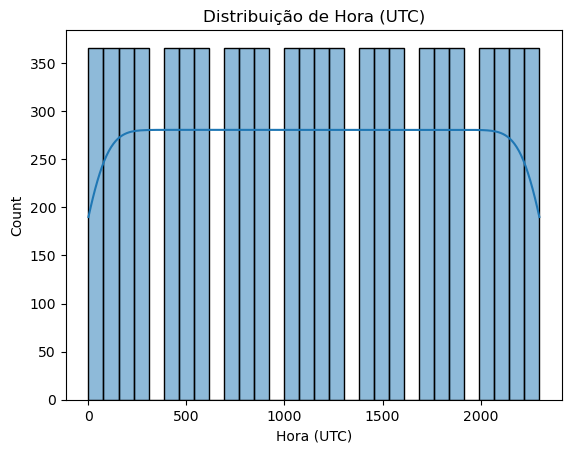

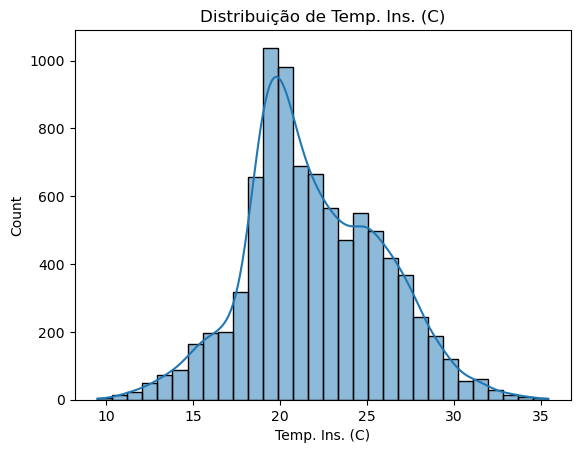

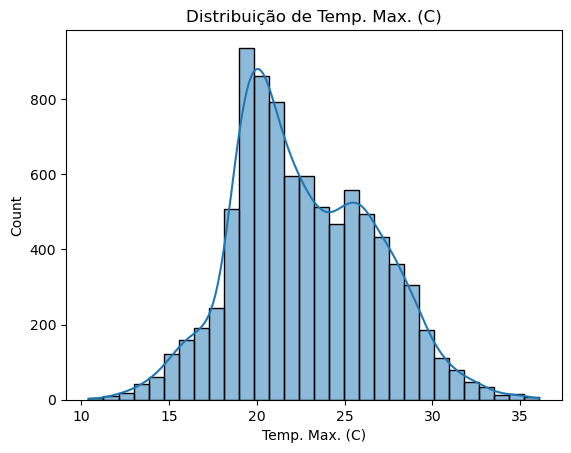

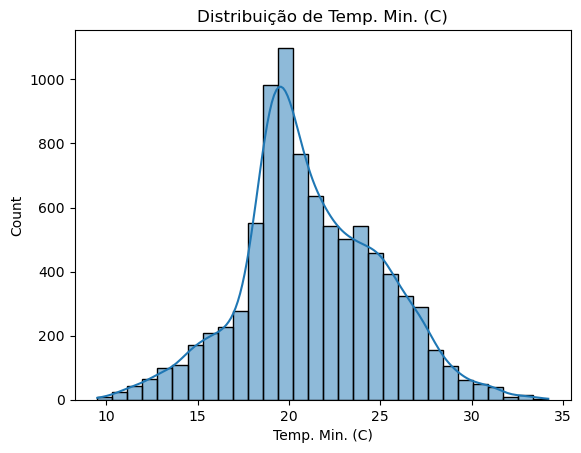

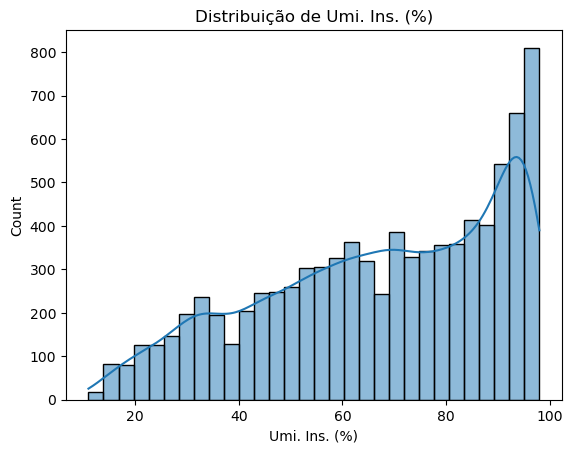

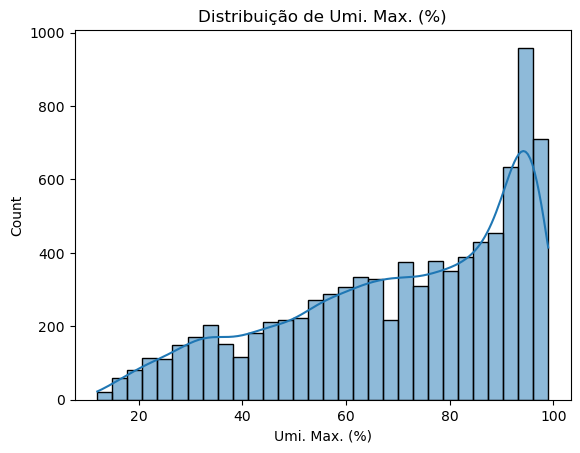

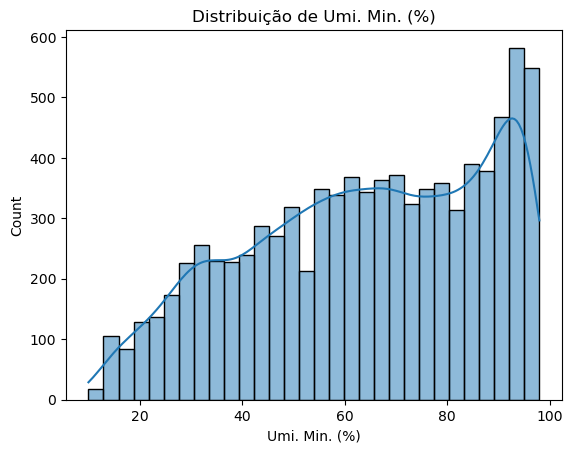

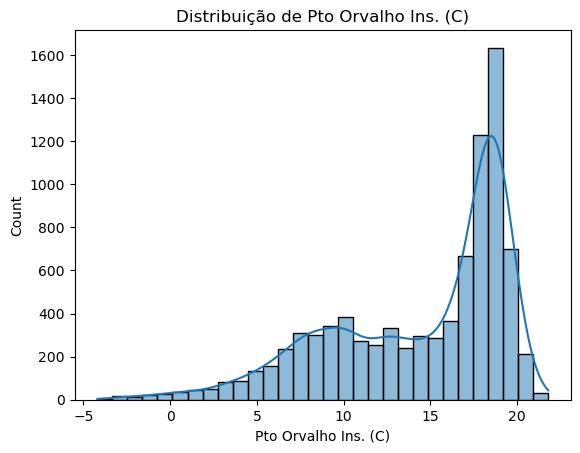

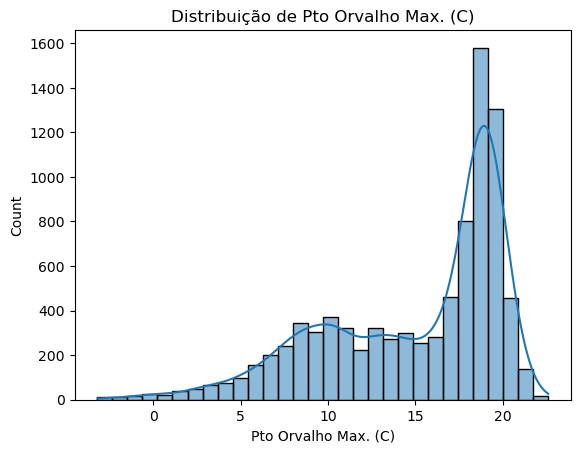

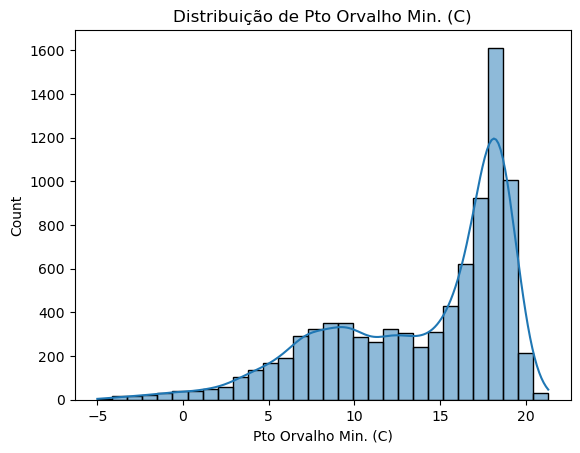

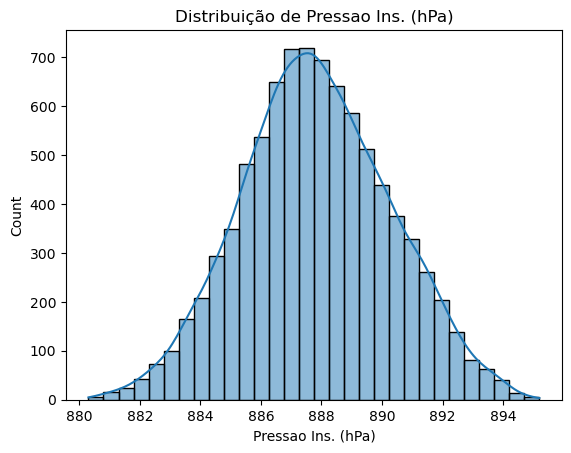

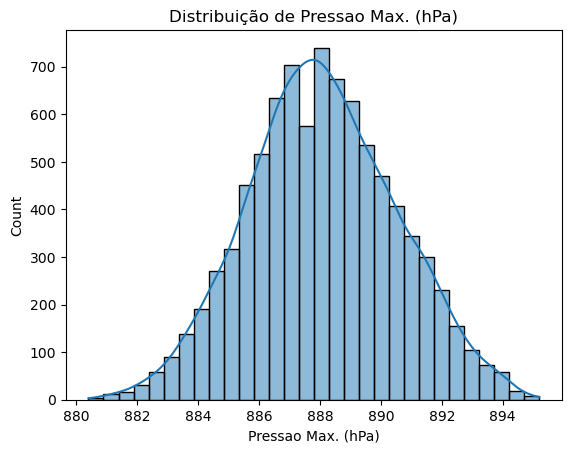

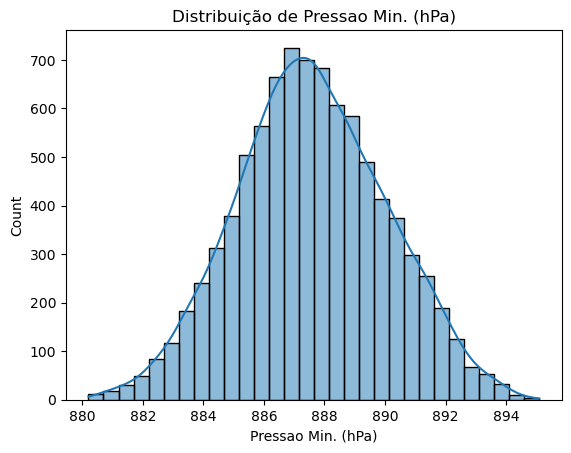

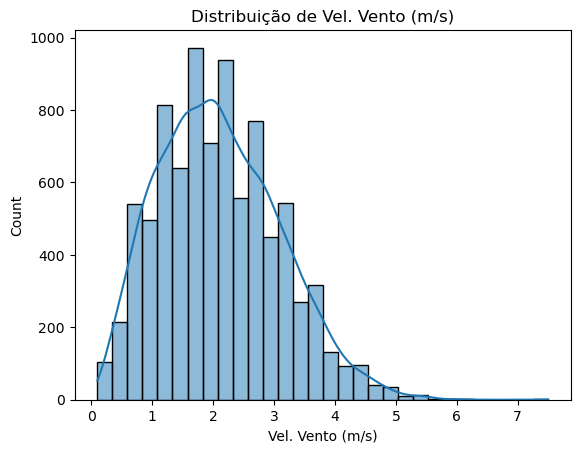

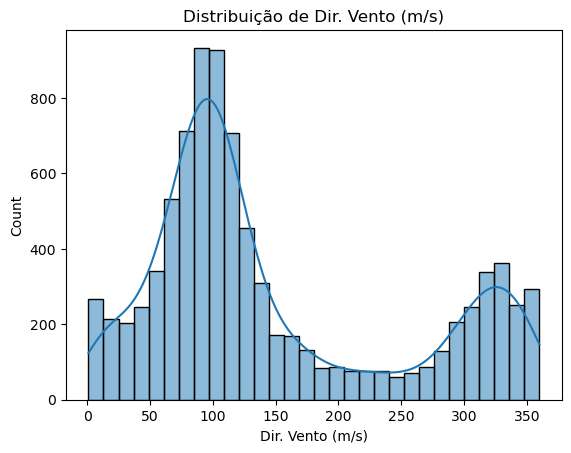

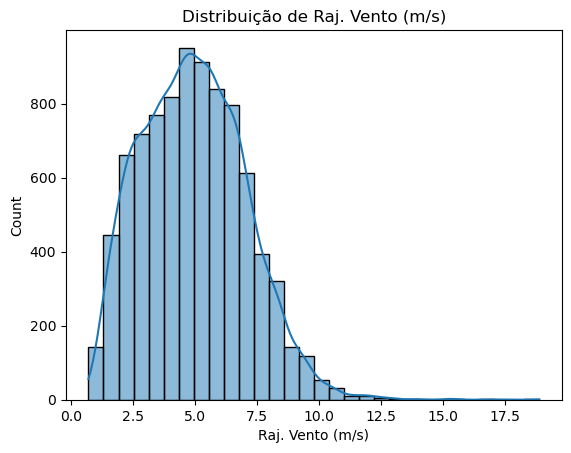

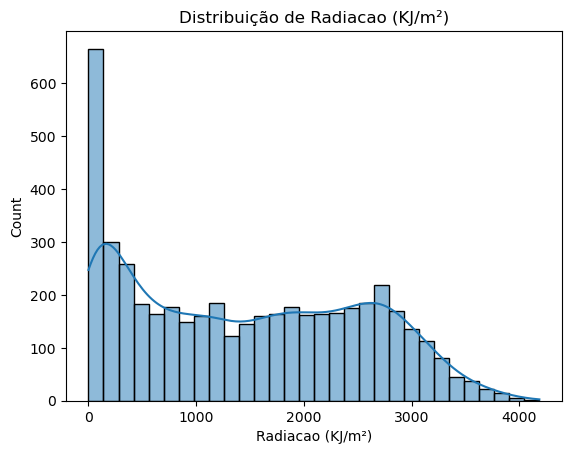

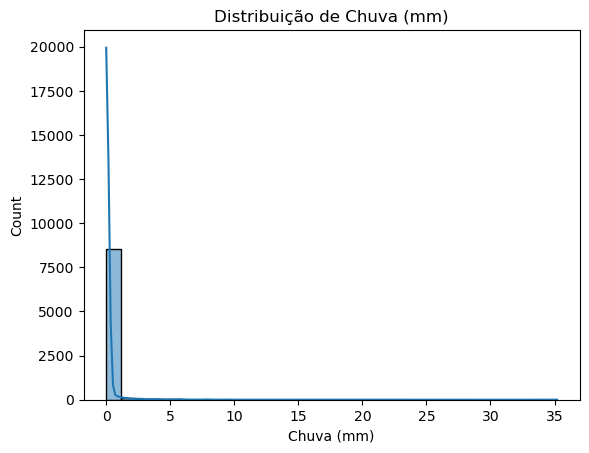

In [14]:
# 8. Verificar distribuição dos dados
print("\nDistribuições:")
for col in numericas:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuição de {col}")
    plt.show()

In [15]:
# 9. Calcular média e variância
print("\nMédia e variância das características numéricas:")
print(df[numericas].mean())
print(df[numericas].var())



Média e variância das características numéricas:
Hora (UTC)              1150.000000
Temp. Ins. (C)            21.941350
Temp. Max. (C)            22.681672
Temp. Min. (C)            21.237775
Umi. Ins. (%)             67.304785
Umi. Max. (%)             70.414754
Umi. Min. (%)             64.137848
Pto Orvalho Ins. (C)      14.441167
Pto Orvalho Max. (C)      14.988718
Pto Orvalho Min. (C)      13.918842
Pressao Ins. (hPa)       887.828154
Pressao Max. (hPa)       888.075488
Pressao Min. (hPa)       887.580580
Vel. Vento (m/s)           2.104499
Dir. Vento (m/s)         148.352861
Raj. Vento (m/s)           4.943795
Radiacao (KJ/m²)        1445.282638
Chuva (mm)                 0.153226
dtype: float64
Hora (UTC)              4.792212e+05
Temp. Ins. (C)          1.542701e+01
Temp. Max. (C)          1.612619e+01
Temp. Min. (C)          1.461728e+01
Umi. Ins. (%)           5.276882e+02
Umi. Max. (%)           5.117359e+02
Umi. Min. (%)           5.358048e+02
Pto Orvalho Ins. (C)    2.61

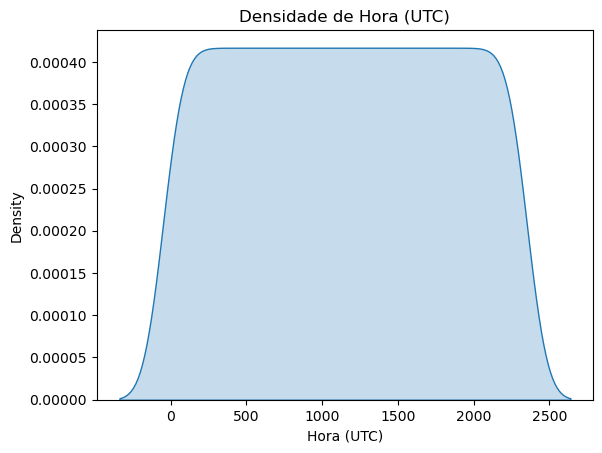

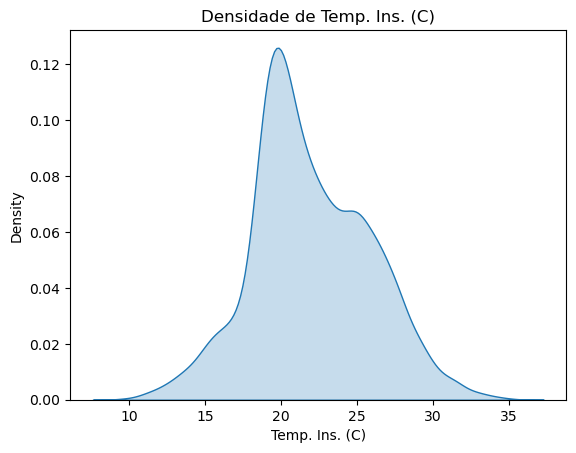

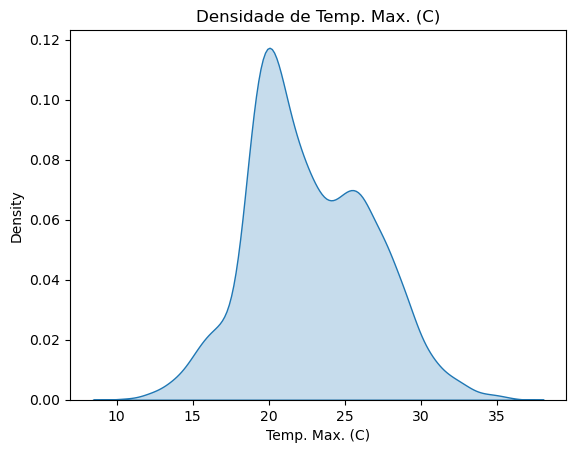

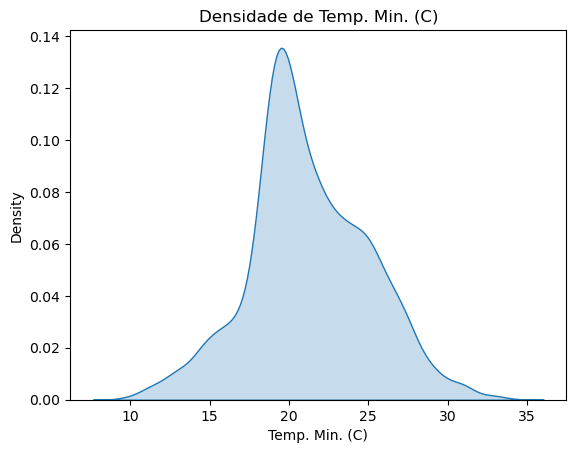

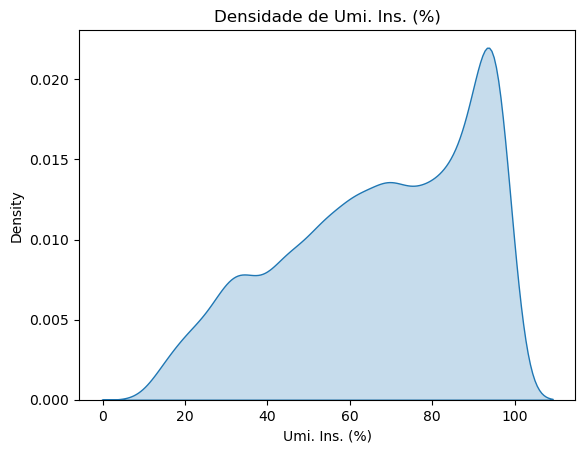

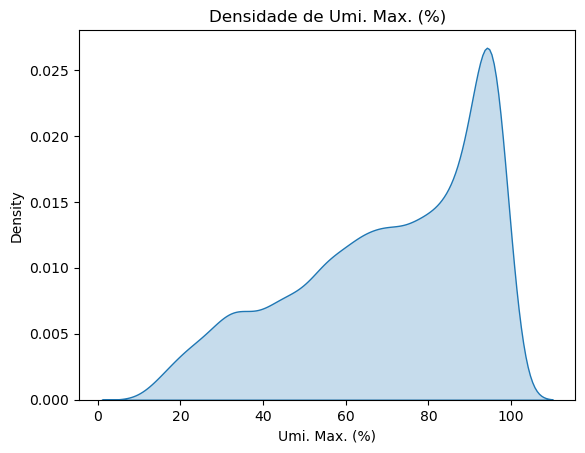

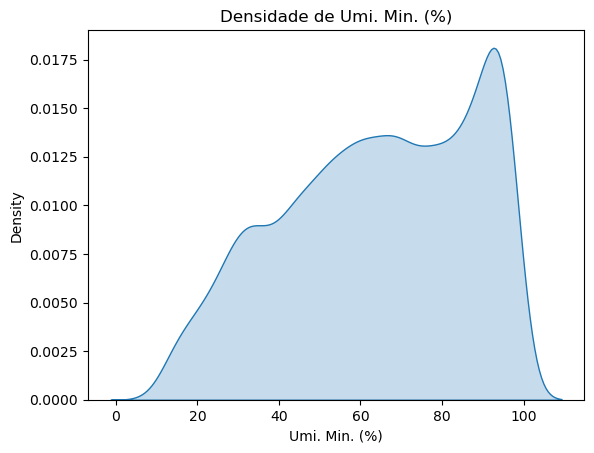

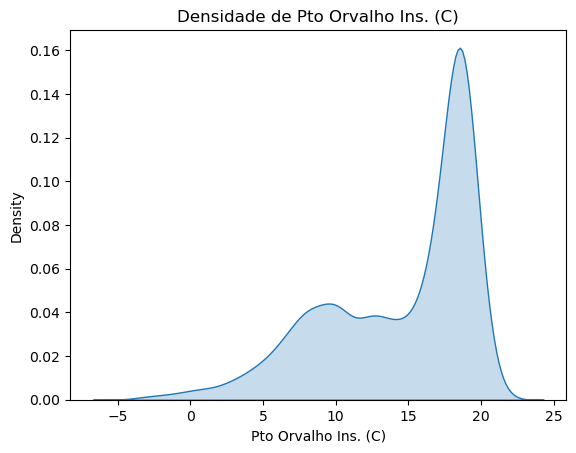

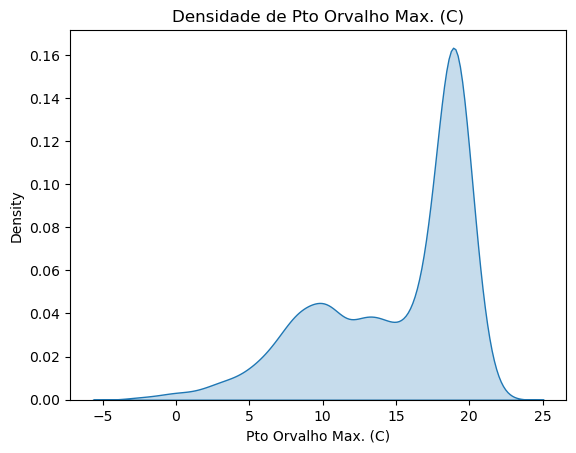

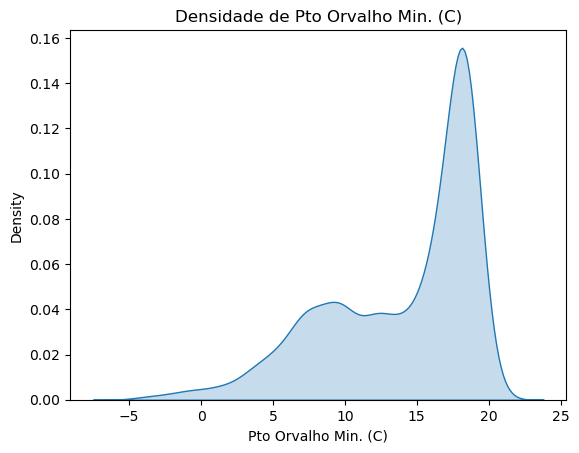

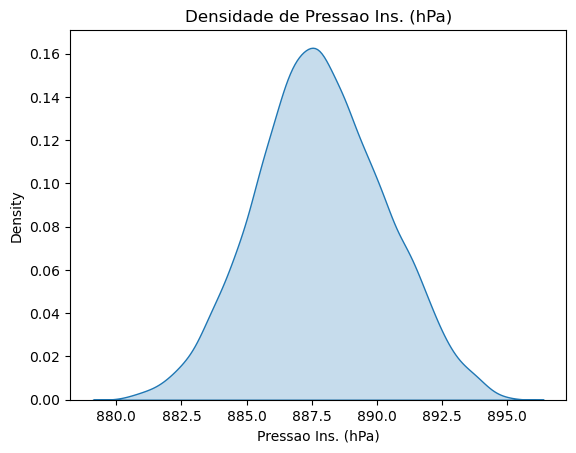

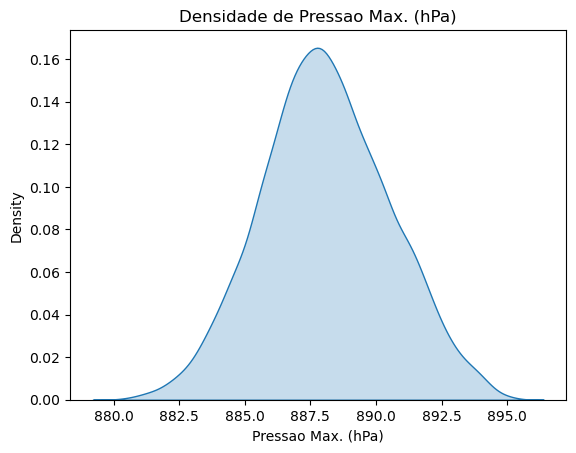

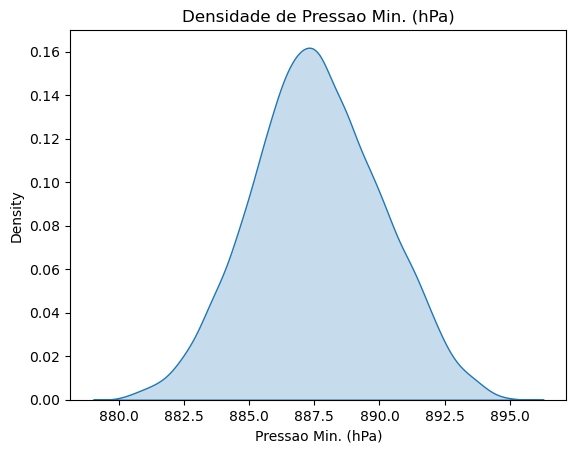

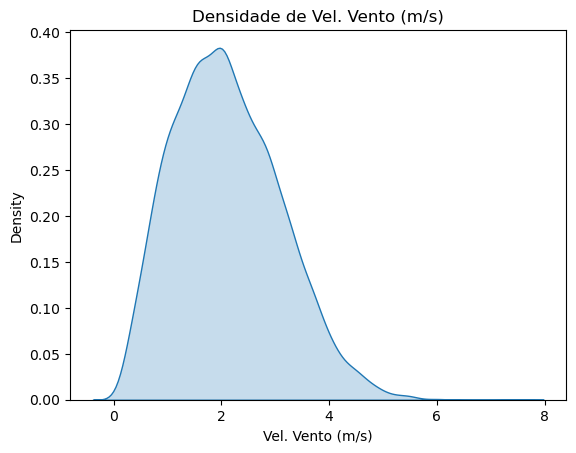

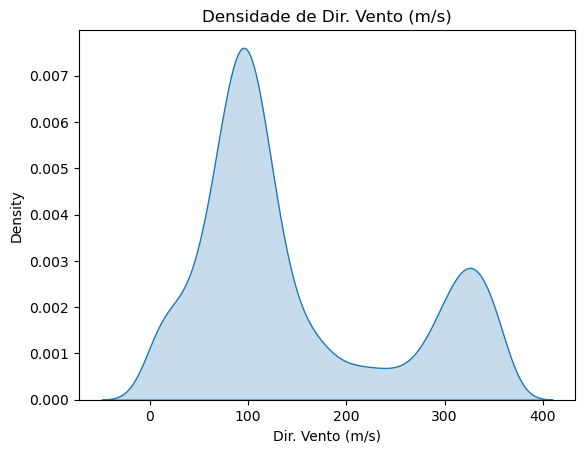

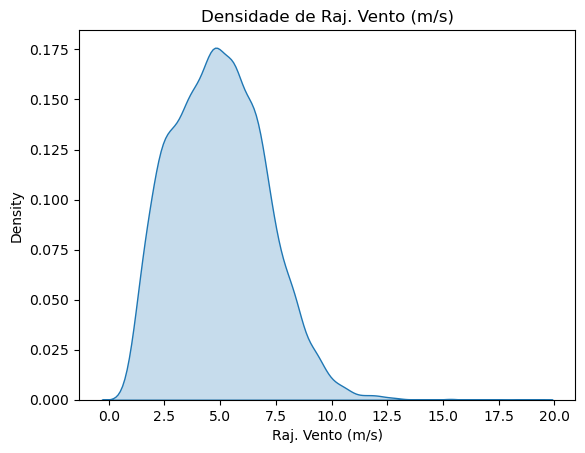

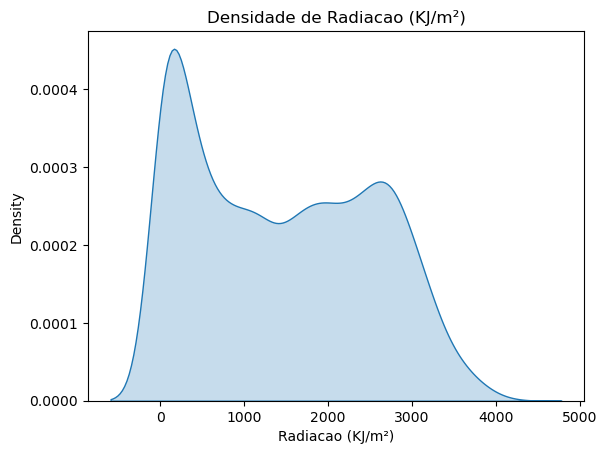

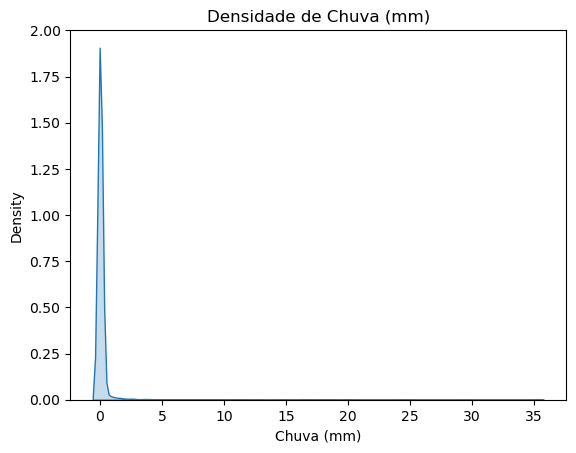

In [16]:
# 10. PDFs e PMFs (visualização de densidade)
for col in numericas:
    plt.figure()
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Densidade de {col}")
    plt.show()



Matriz de correlação (Pearson):


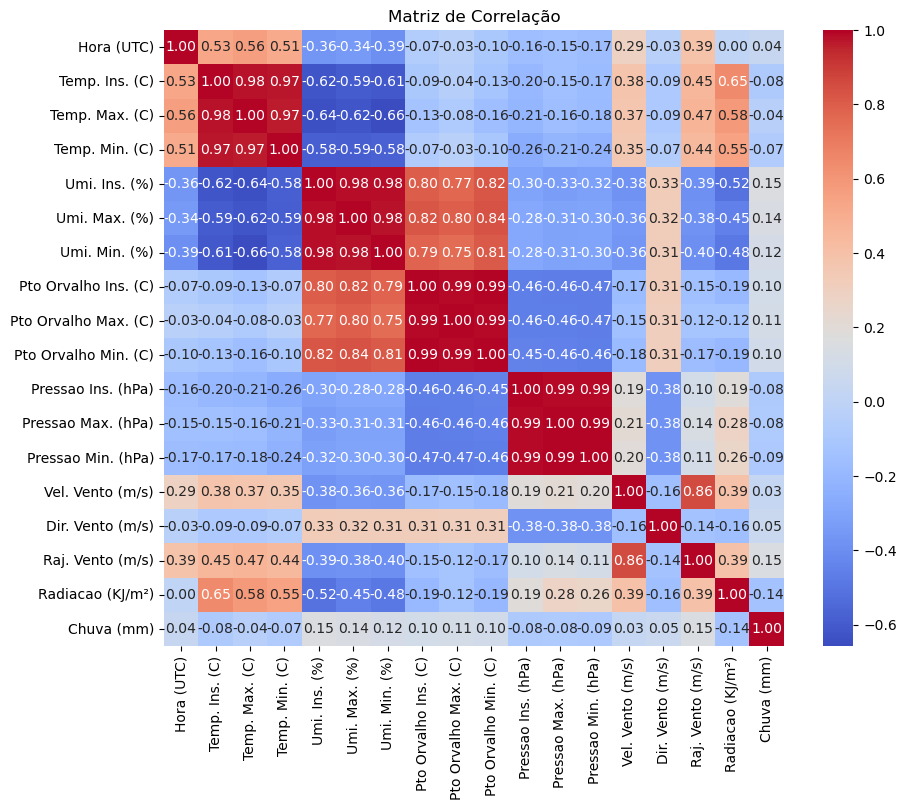

In [17]:
# 11. Identificar correlações significativas
print("\nMatriz de correlação (Pearson):")
correlation_matrix = df[numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [18]:
#Criação de Atributos derivados para análise de correlação 
df['amplitude_Pressao'] = df['Pressao Max. (hPa)'] - df['Pressao Min. (hPa)']
df['amplitude_Umidade'] = df['Umi. Max. (%)'] - df['Umi. Min. (%)']
df['amplitude_Temperatura'] = df['Temp. Max. (C)'] - df['Temp. Min. (C)']


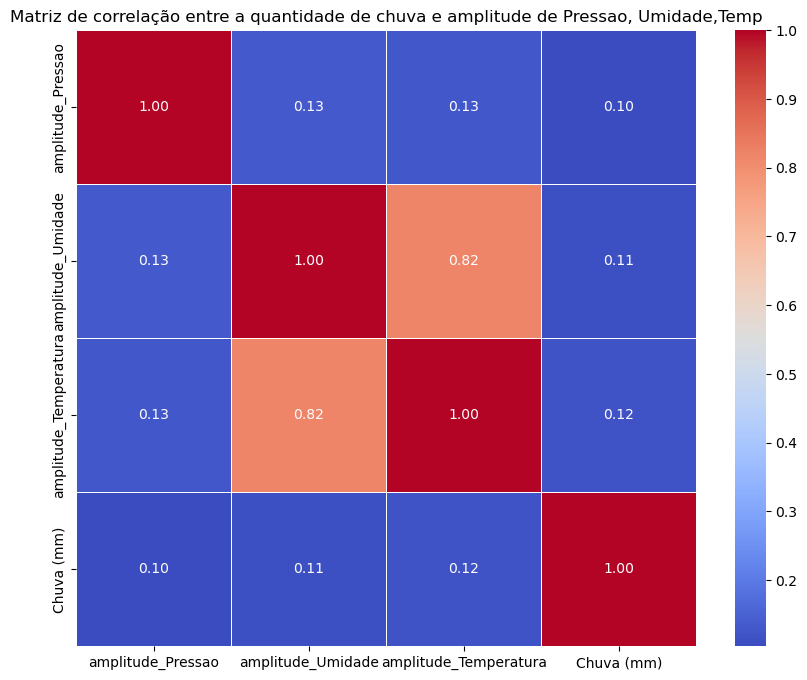

In [19]:
df_reduzido = df[['amplitude_Pressao','amplitude_Umidade','amplitude_Temperatura','Chuva (mm)']]
correlation_matrix = df_reduzido.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm',fmt=".2f",linewidth=0.5)
plt.title('Matriz de correlação entre a quantidade de chuva e amplitude de Pressao, Umidade,Temp')
plt.show()

In [20]:
# Verificar os primeiros valores do índice
print("Primeiros valores do índice:")
print(df.index)

# Confirmar o tipo do índice
print("\nTipo do índice:")
print(type(df.index))

# Verificar as primeiras linhas do DataFrame
print("\nPrimeiras linhas do DataFrame:")
print(df.head())

Primeiros valores do índice:
RangeIndex(start=0, stop=8784, step=1)

Tipo do índice:
<class 'pandas.core.indexes.range.RangeIndex'>

Primeiras linhas do DataFrame:
         Data  Hora (UTC)  Temp. Ins. (C)  Temp. Max. (C)  Temp. Min. (C)  \
0  25/01/2024           0            20.7            20.7            20.5   
1  25/01/2024         100            20.5            20.7            20.4   
2  25/01/2024         200            20.2            20.5            20.2   
3  25/01/2024         300            20.3            20.4            20.2   
4  25/01/2024         400            20.6            20.7            20.3   

   Umi. Ins. (%)  Umi. Max. (%)  Umi. Min. (%)  Pto Orvalho Ins. (C)  \
0           95.0           96.0           95.0                  19.9   
1           95.0           96.0           95.0                  19.7   
2           95.0           96.0           95.0                  19.4   
3           96.0           96.0           95.0                  19.7   
4           9

In [21]:
# Verificar se a coluna 'data_hora' existe
if 'data_hora' not in df.columns:
    print("A coluna 'data_hora' não existe no DataFrame. Tentando criá-la...")

    if 'Data' in df.columns and 'Hora (UTC)' in df.columns:
        df['data_hora'] = pd.to_datetime(
            df['Data'] + ' ' + df['Hora (UTC)'].astype(str).str.zfill(4),
            format='%d/%m/%Y %H%M',
            errors='coerce'
        )
        print("Coluna 'data_hora' criada com sucesso!")
    else:
        print("As colunas 'Data' e/ou 'Hora (UTC)' não estão presentes.")
        raise ValueError("Não foi possível criar a coluna 'data_hora'.")

# Remover valores nulos de 'data_hora'
df = df.dropna(subset=['data_hora'])

# Configurar como índice e garantir que é um DatetimeIndex
df.set_index('data_hora', inplace=True)
df.index = pd.to_datetime(df.index)  # Garantir que o índice está no formato datetime

# Confirmar que o índice é do tipo DatetimeIndex
if isinstance(df.index, pd.DatetimeIndex):
    print("O índice 'data_hora' foi configurado corretamente!")
else:
    print("Erro: O índice não está no formato DatetimeIndex.")


O índice 'data_hora' foi configurado corretamente!


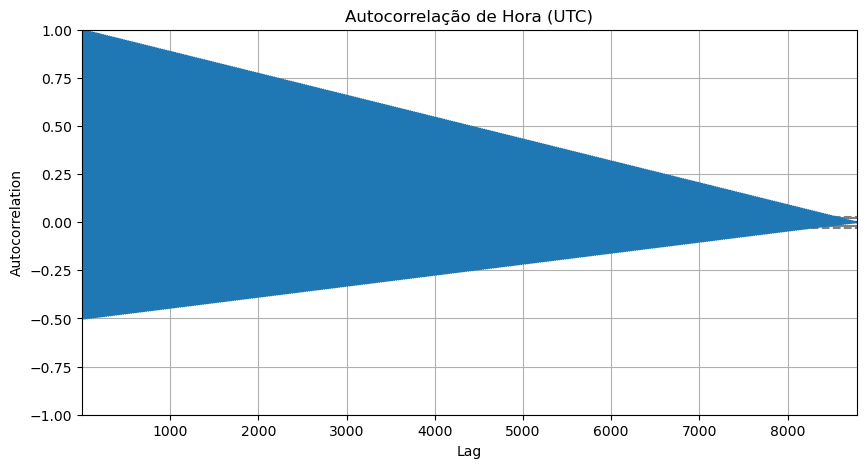

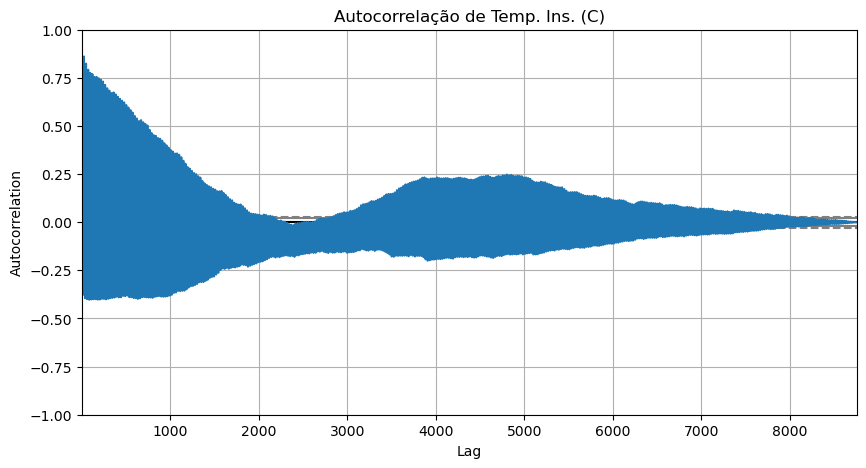

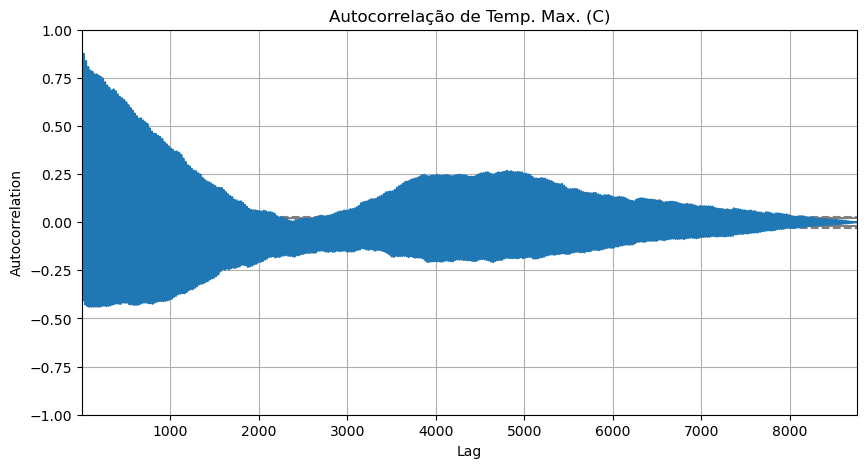

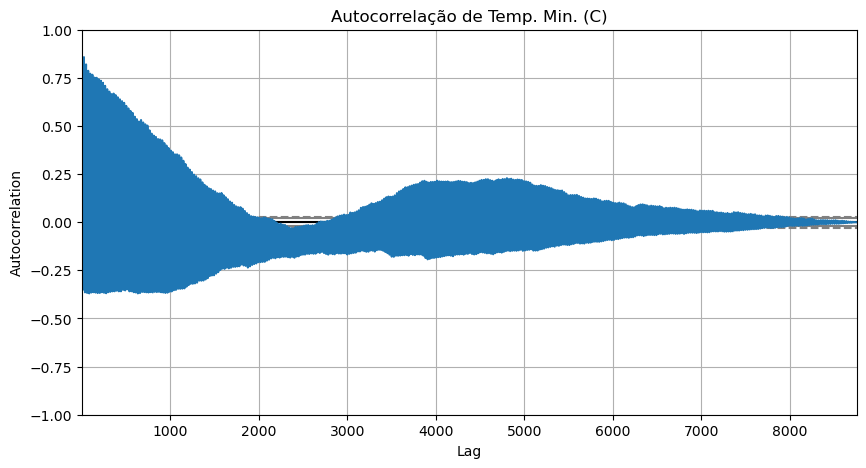

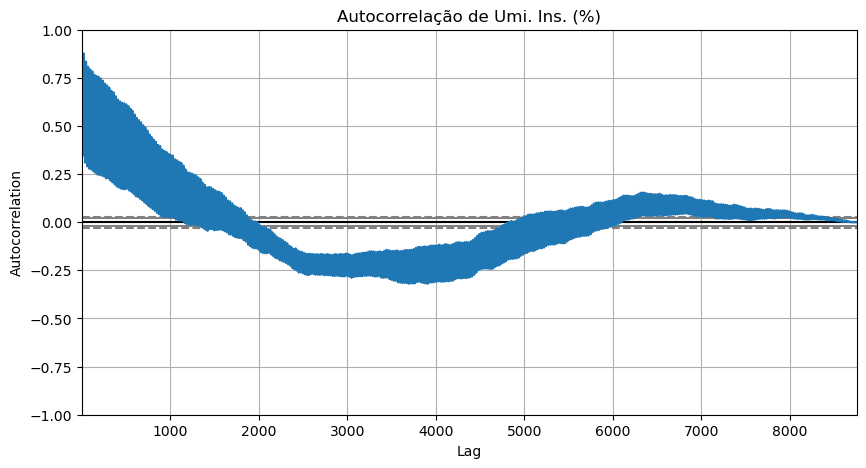

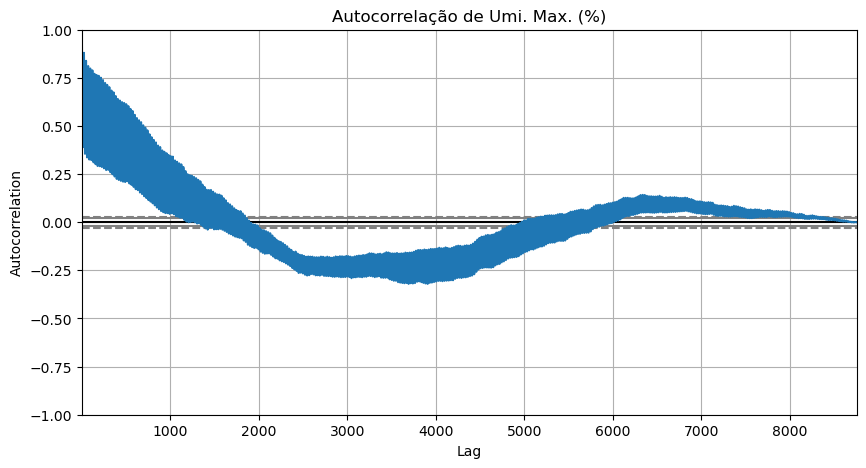

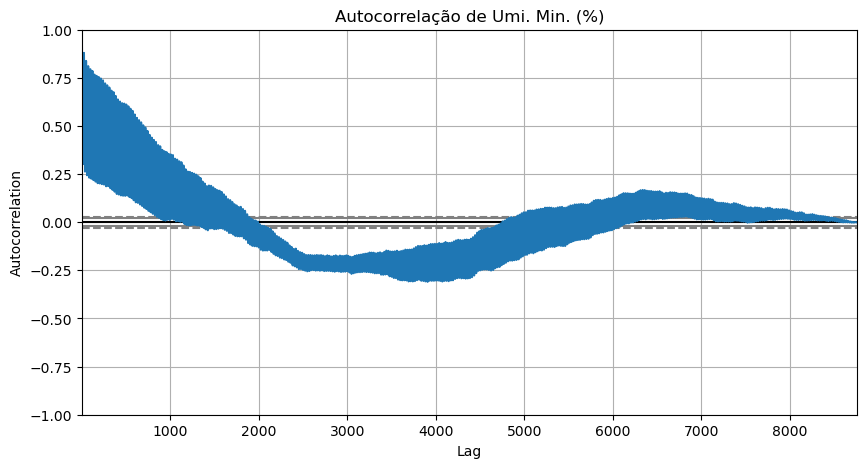

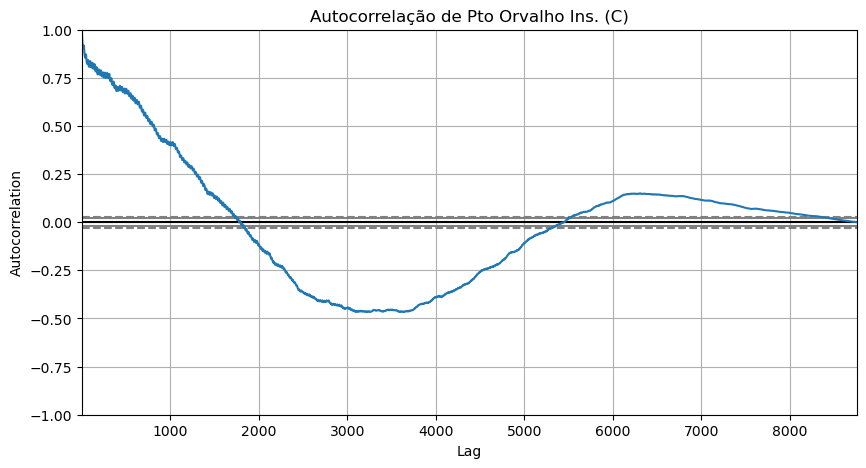

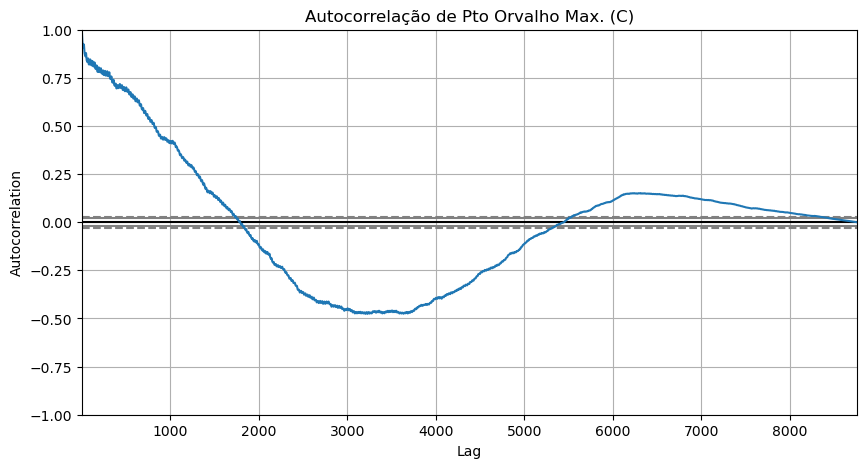

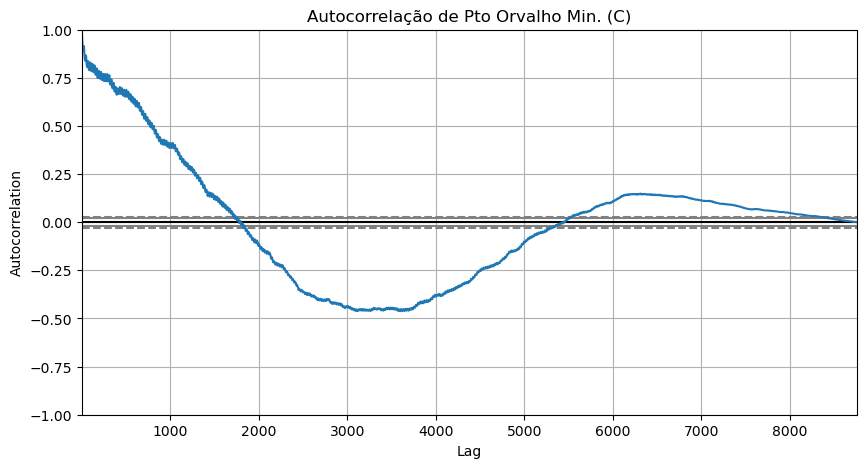

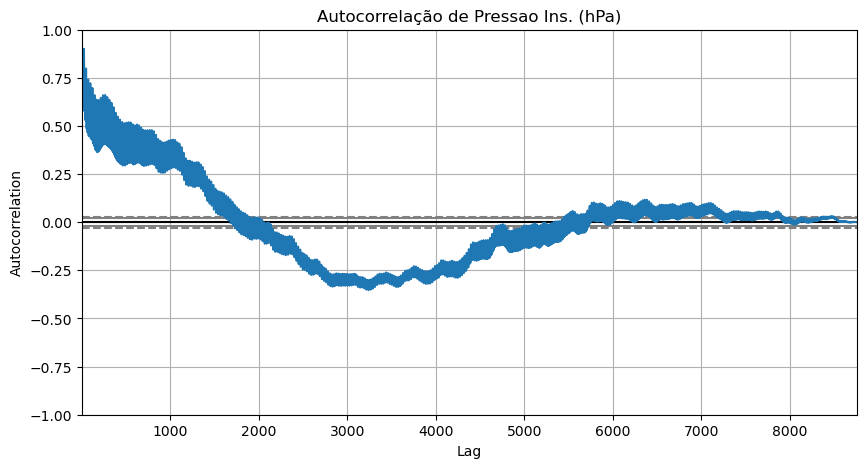

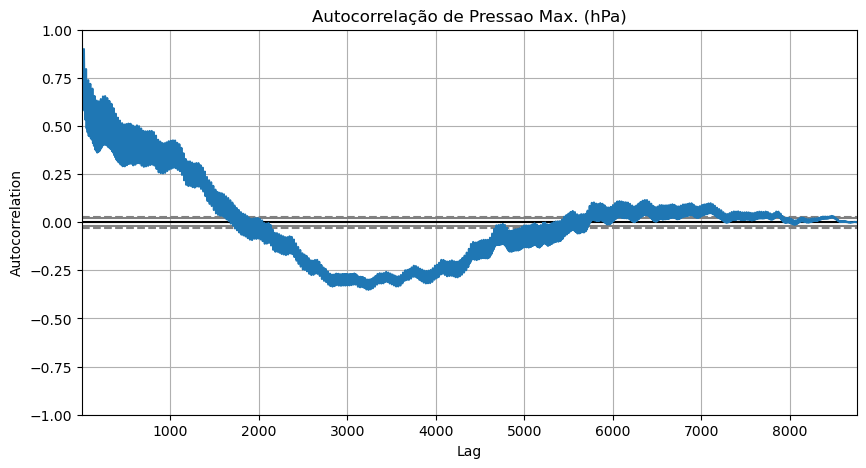

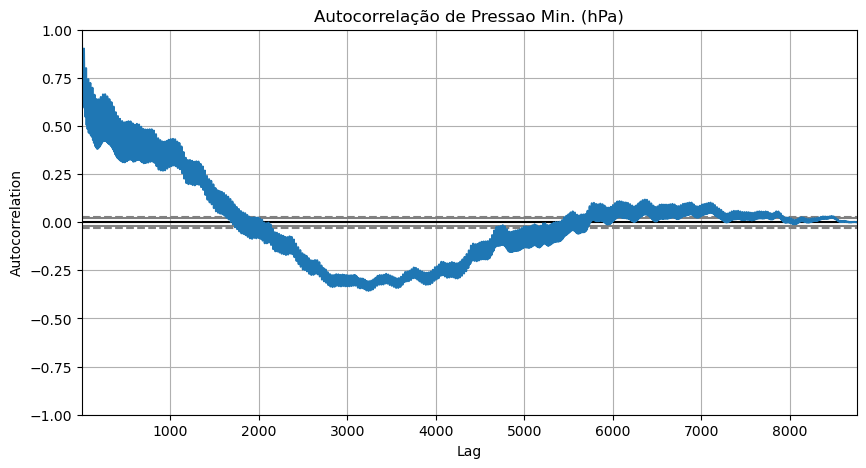

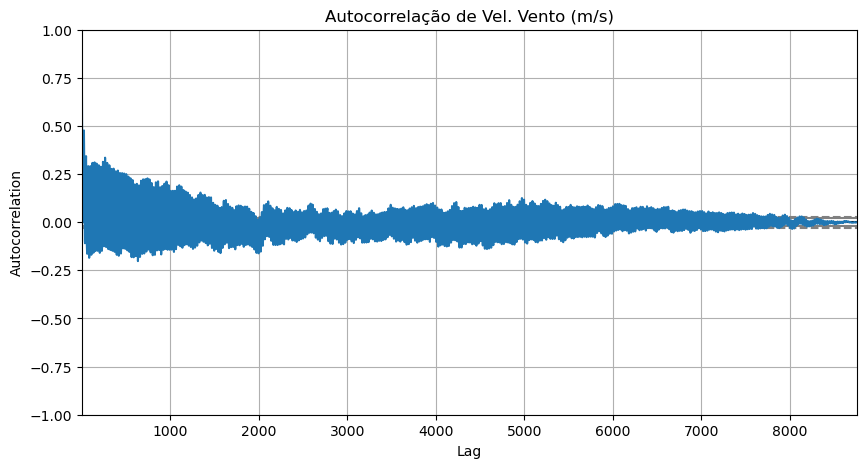

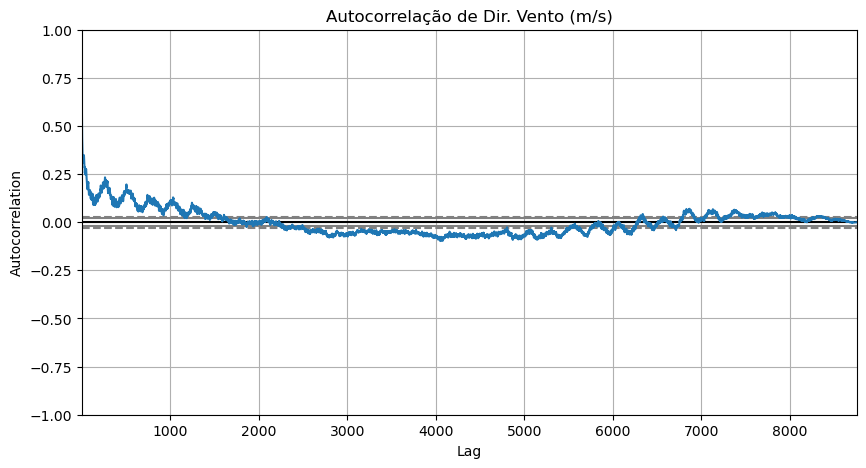

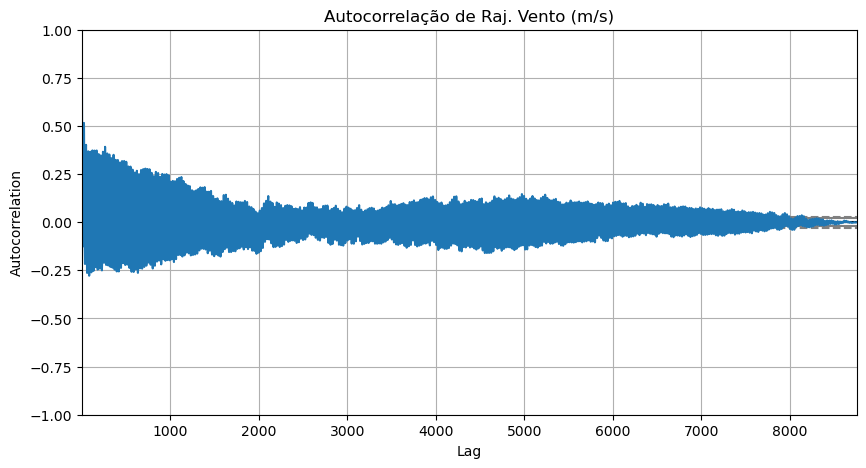

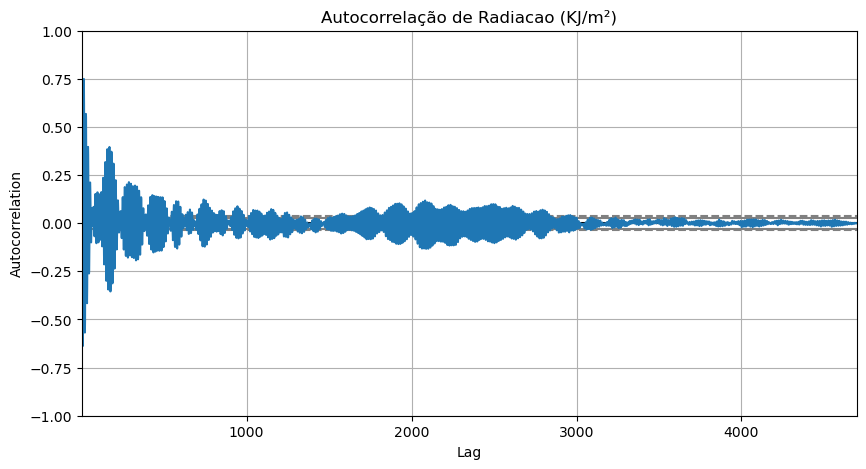

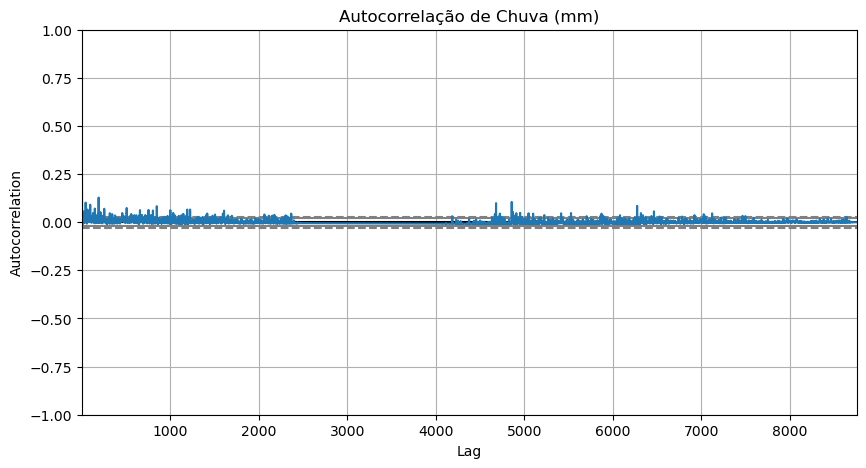

In [22]:
# 12. Analisar autocorrelação (se aplicável a dados temporais)
if isinstance(df.index, pd.DatetimeIndex):  # Verificar se o índice é temporal
    for col in numericas:
        # Garantir que há dados suficientes na coluna
        if df[col].dropna().shape[0] > 1:
            plt.figure(figsize=(10, 5))
            pd.plotting.autocorrelation_plot(df[col].dropna())
            plt.title(f"Autocorrelação de {col}")
            plt.show()
        else:
            print(f"A coluna {col} não possui dados suficientes para análise de autocorrelação.")
else:
    print("O índice 'data_hora' não está configurado corretamente.")

Nomes das colunas no DataFrame: ['Data', 'Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/m²)', 'Chuva (mm)', 'amplitude_Pressao', 'amplitude_Umidade', 'amplitude_Temperatura']

Boxplots para detectar outliers nas colunas numéricas:


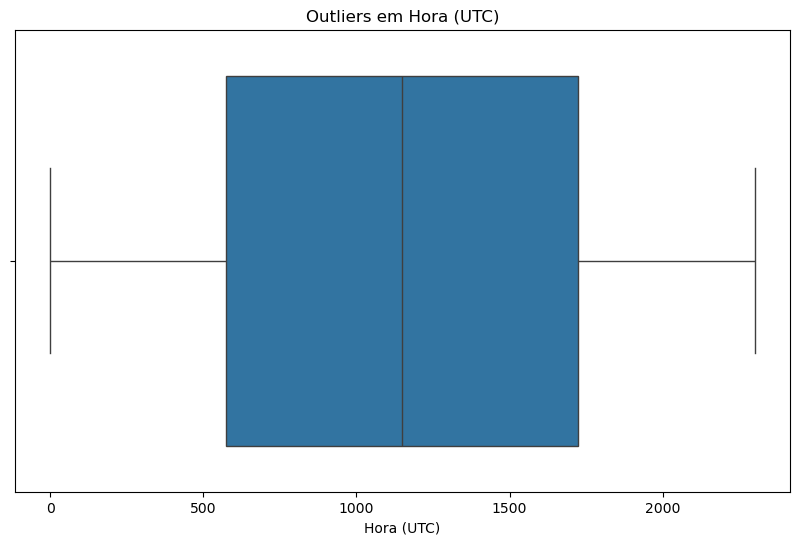

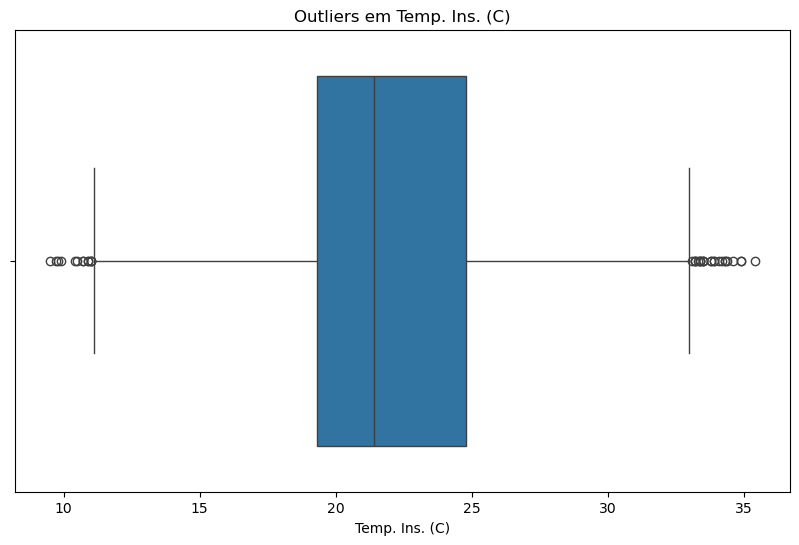

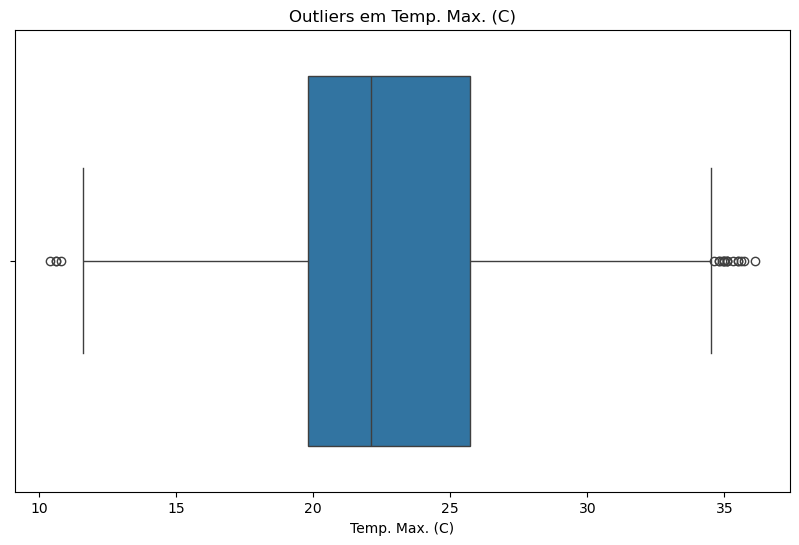

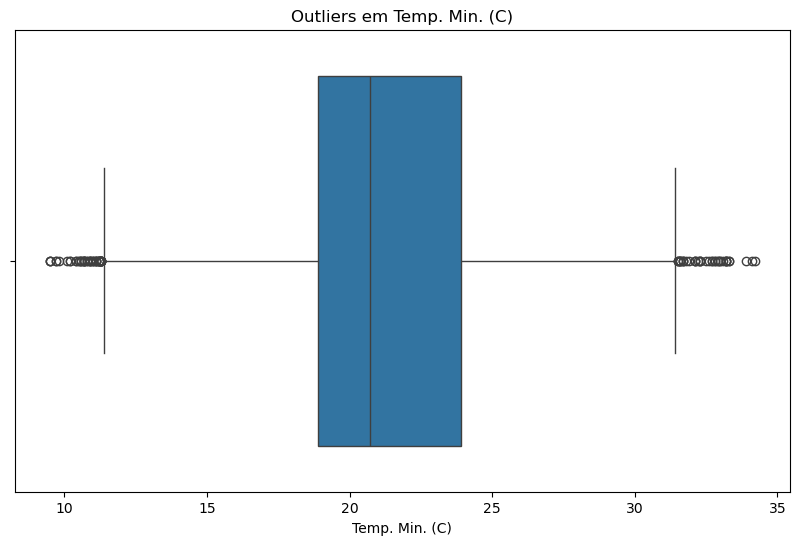

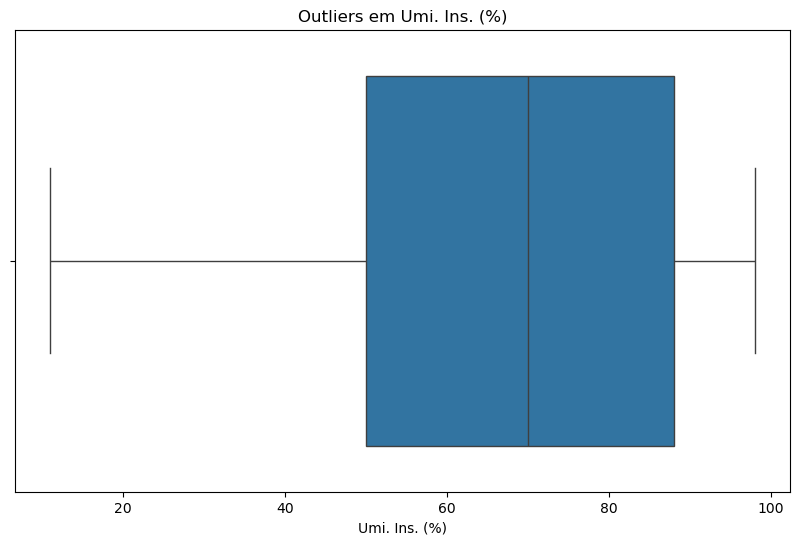

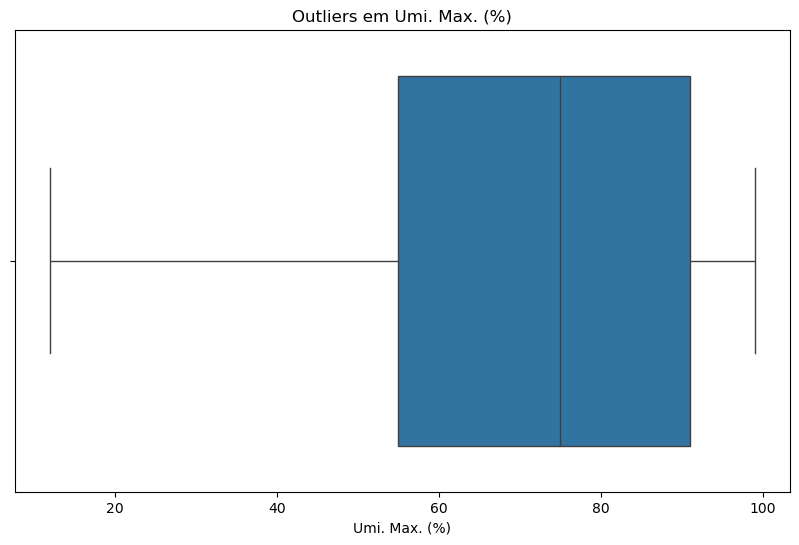

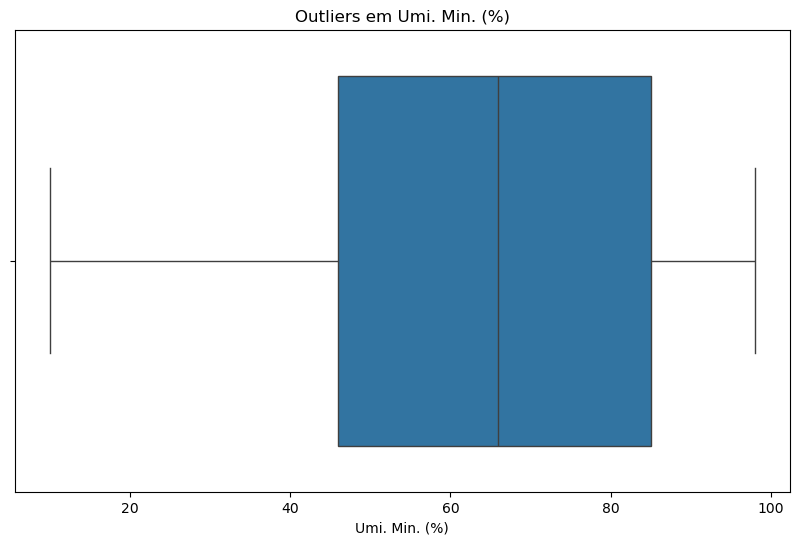

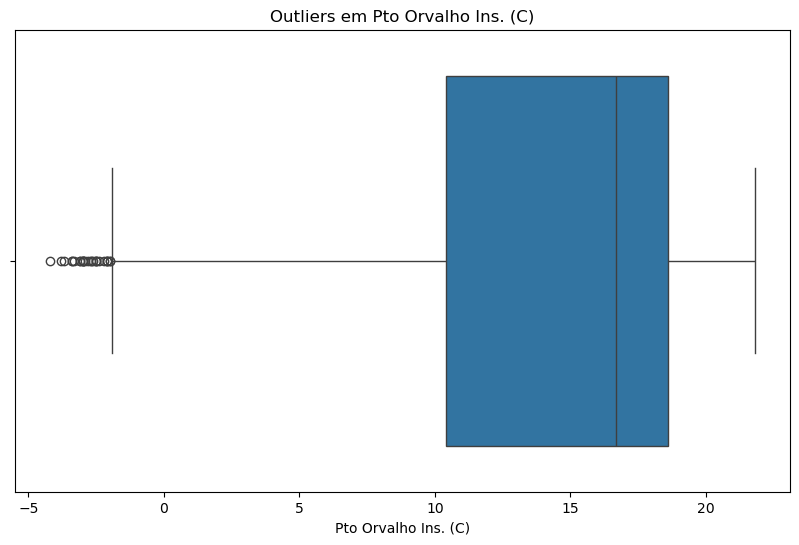

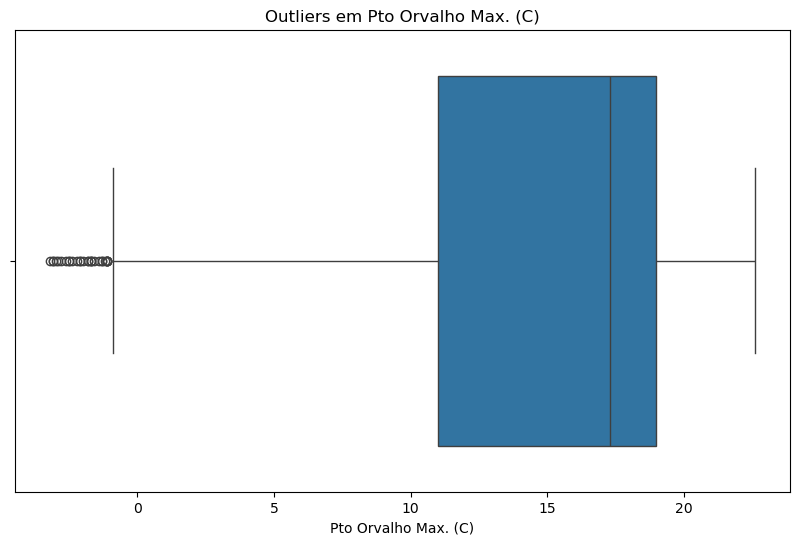

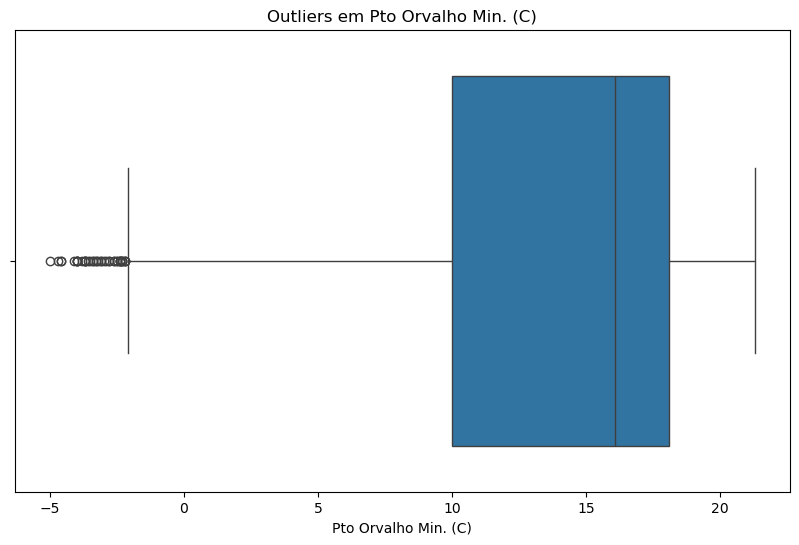

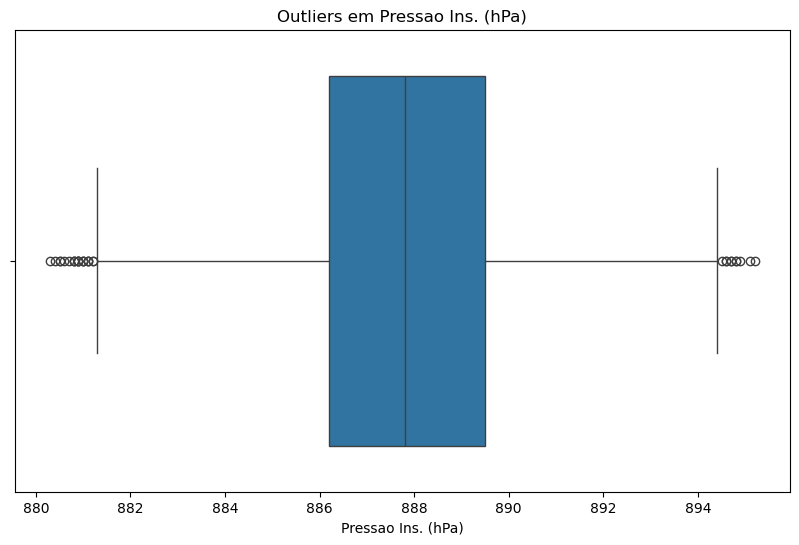

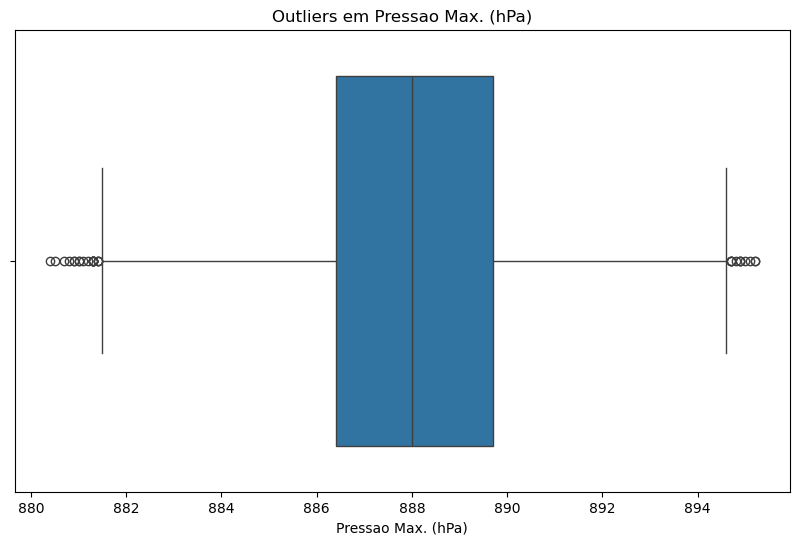

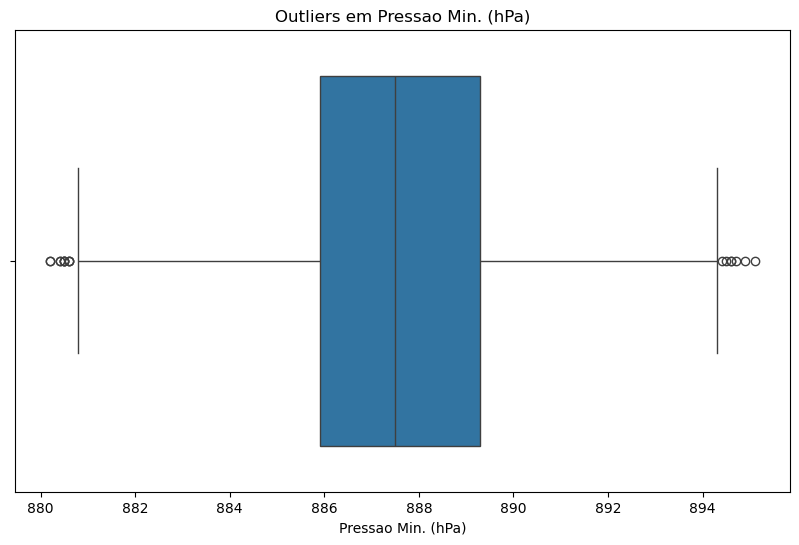

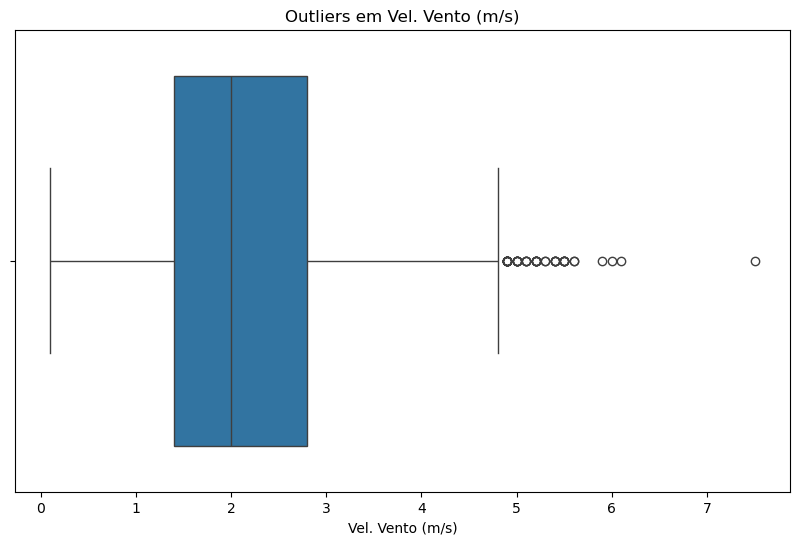

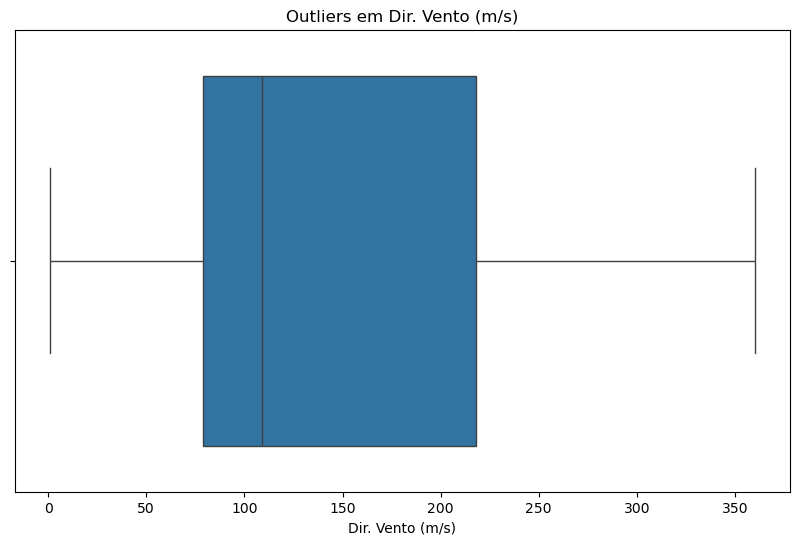

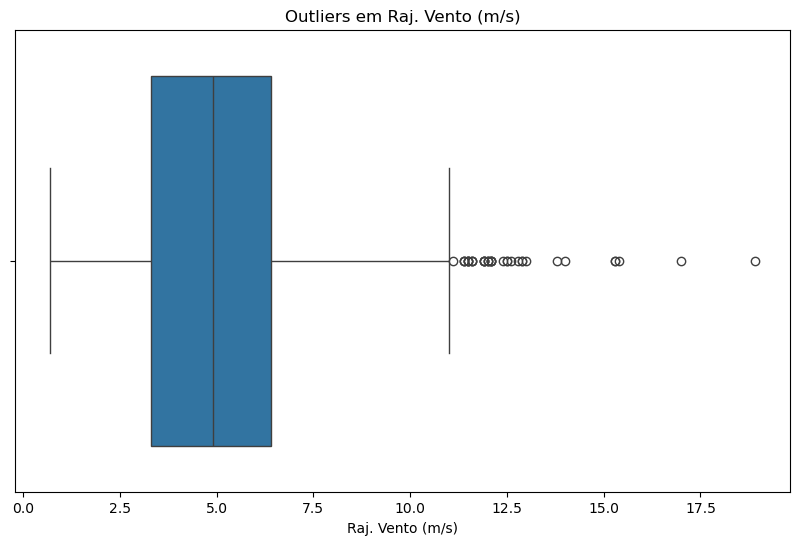

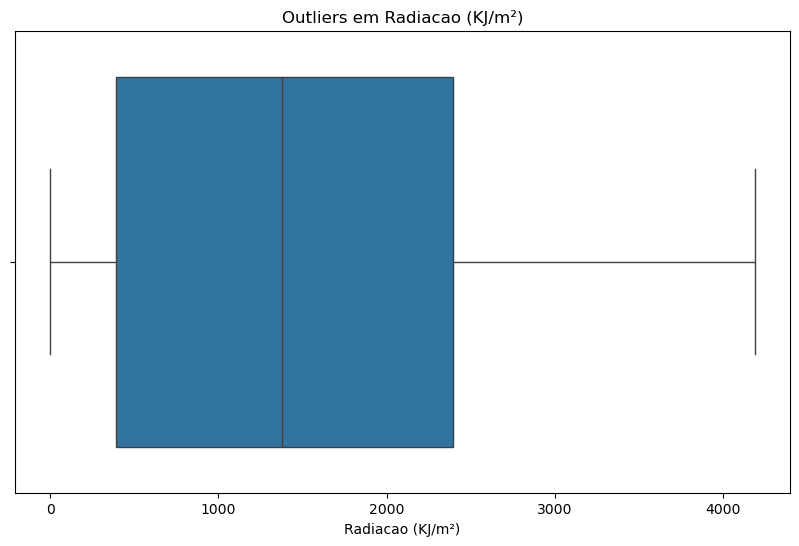

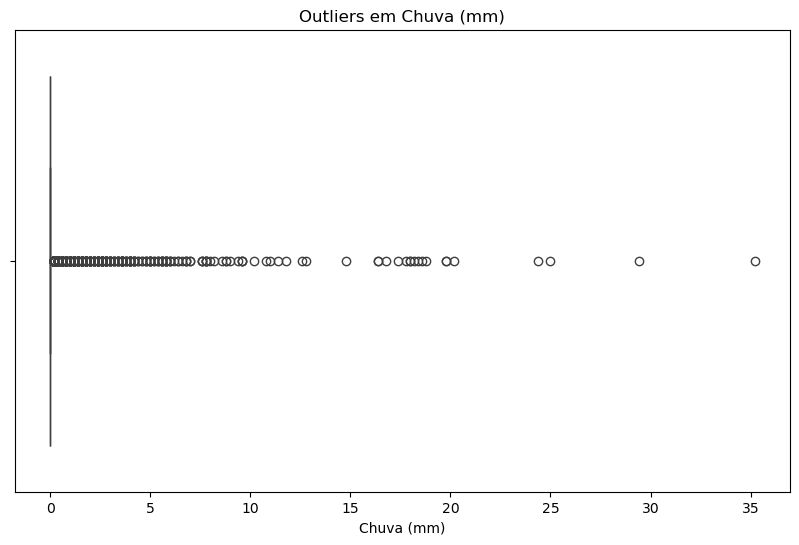

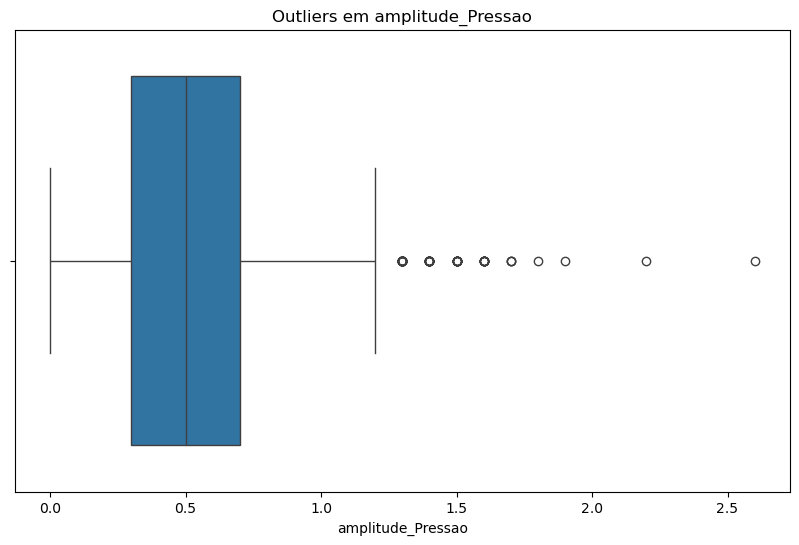

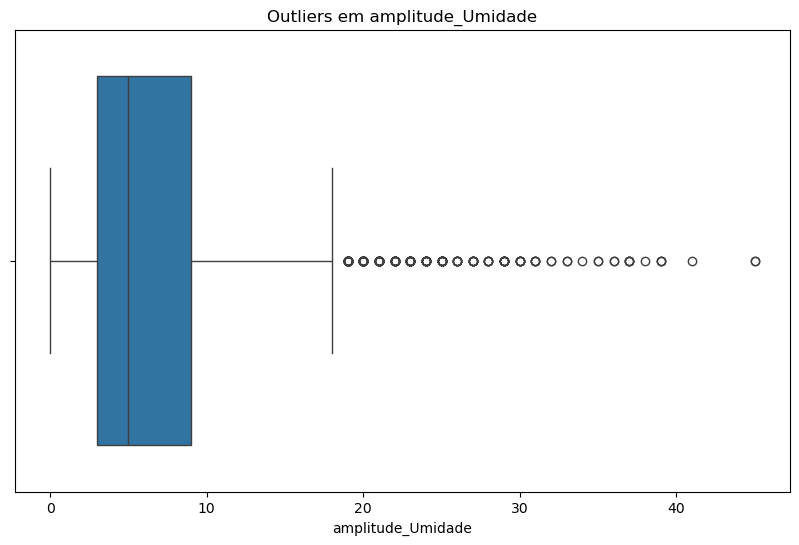

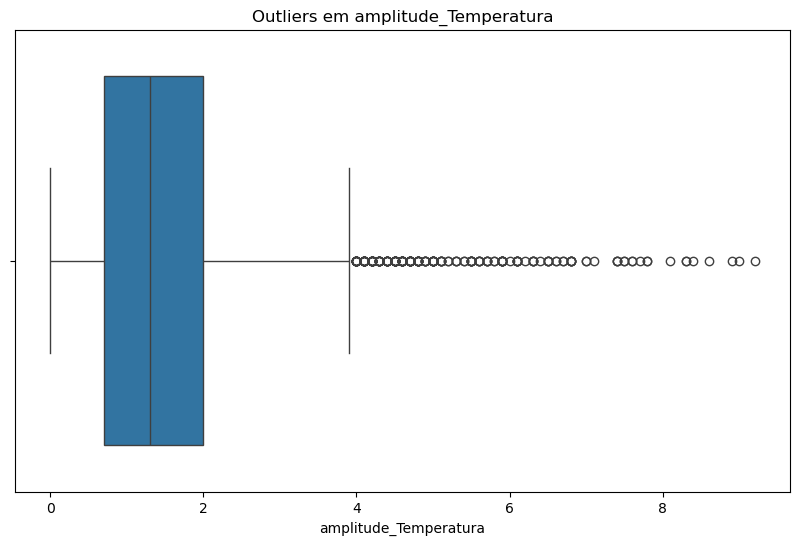

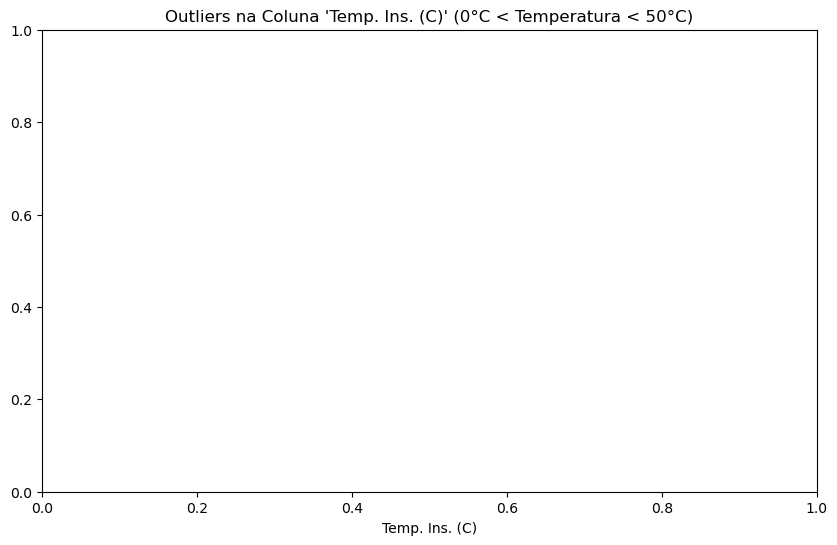


Estatísticas descritivas para valores de temperatura entre 0°C e 50°C (Temp. Ins. (C)):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Temp. Ins. (C), dtype: float64


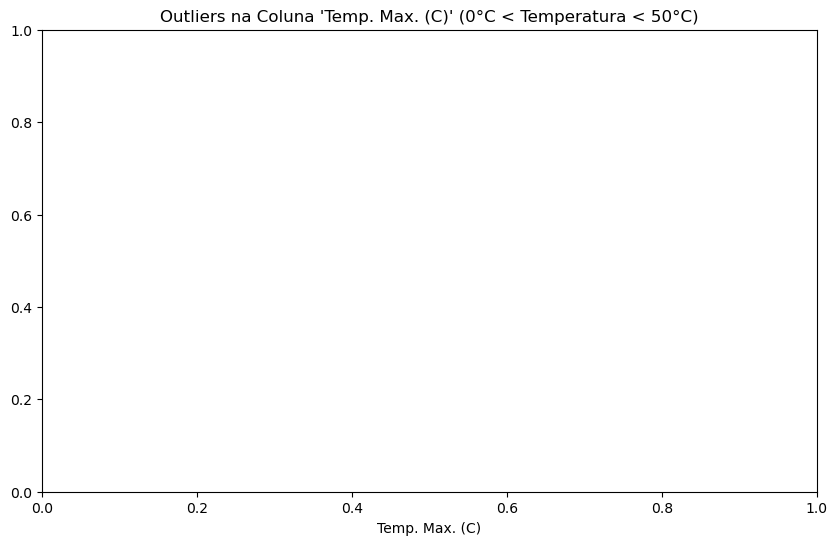


Estatísticas descritivas para valores de temperatura entre 0°C e 50°C (Temp. Max. (C)):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Temp. Max. (C), dtype: float64


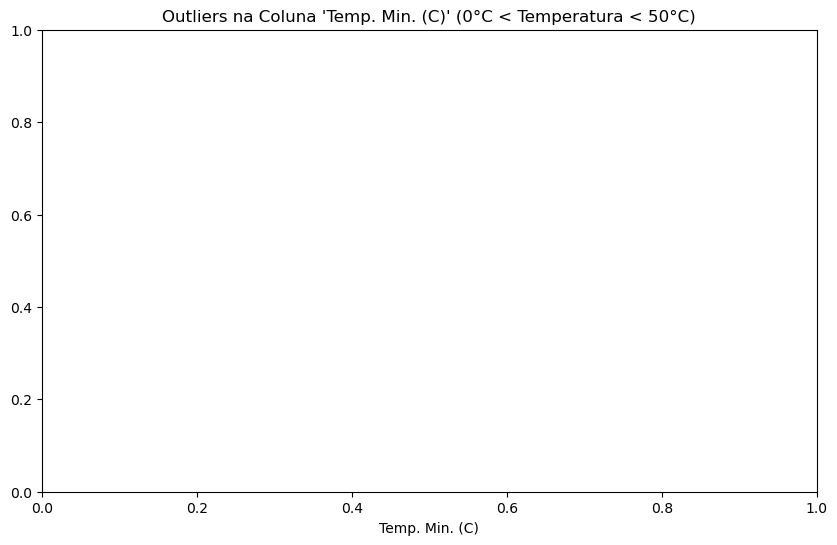


Estatísticas descritivas para valores de temperatura entre 0°C e 50°C (Temp. Min. (C)):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Temp. Min. (C), dtype: float64


In [33]:
# 13. Detectar outliers para todas as colunas numéricas

# Verificar nomes exatos das colunas
print("Nomes das colunas no DataFrame:", df.columns.tolist())

# Selecionar apenas colunas numéricas
numericas = df.select_dtypes(include=['float64', 'int64']).columns

print("\nBoxplots para detectar outliers nas colunas numéricas:")
for col in numericas:ZZ
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers em {col}")
    plt.xlabel(col)
    plt.show()

# Usar os nomes corretos das colunas de temperatura
temp_cols = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']

for col in temp_cols:
    if col in df.columns:
        # Filtrar valores entre 0°C e 50°C
        dados_temp_filtrada = df[(df[col] > 0) & (df[col] < 50)]

        # Gerar o boxplot para os valores de temperatura filtrados
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=dados_temp_filtrada[col])
        plt.title(f"Outliers na Coluna '{col}' (0°C < Temperatura < 50°C)")
        plt.xlabel(col)
        plt.show()

        # Exibir as estatísticas descritivas para os valores filtrados de temperatura
        print(f"\nEstatísticas descritivas para valores de temperatura entre 0°C e 50°C ({col}):")
        print(dados_temp_filtrada[col].describe())
    else:
        print(f"\nA coluna '{col}' não foi encontrada no DataFrame.")


In [37]:

# Selecionar apenas colunas numéricas
df_numerico = df_final.select_dtypes(include=['float64', 'int64'])  

# Calcular a matriz de correlações apenas para colunas numéricas
correlacoes = df_numerico.corr()

# Lista de colunas de temperatura
temp_cols = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']

# Verificar se as colunas de temperatura estão presentes na matriz de correlação
for temp_col in temp_cols:
    if temp_col in correlacoes.index and temp_col in correlacoes.columns:
        # Ordenar os fatores pela correlação com a temperatura correspondente
        fatores_influentes = correlacoes[temp_col].sort_values(ascending=False)
        
        print(f"\nCorrelação dos fatores com {temp_col} (em ordem decrescente):")
        print(fatores_influentes)
    else:
        print(f"\nA coluna '{temp_col}' não está presente na matriz de correlações.")


NameError: name 'df_final' is not defined

In [38]:

# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])  

# Calcular a matriz de correlações apenas para colunas numéricas
correlacoes = df_numerico.corr()

# Identificar os fatores mais correlacionados com 'Temperatura (°C)'
if 'Temperatura (°C)' in correlacoes.index and 'Temperatura (°C)' in correlacoes.columns:
    # Ordenar os fatores pela correlação com 'Temperatura (°C)'
    fatores_influentes = correlacoes['Temperatura (°C)'].sort_values(ascending=False)
    
    print("Correlação dos fatores com a temperatura (em ordem decrescente):")
    print(fatores_influentes)
else:
    print("A coluna 'Temperatura (°C)' não está presente na matriz de correlações.")


A coluna 'Temperatura (°C)' não está presente na matriz de correlações.


In [ ]:
'''
# Selecionar apenas colunas numéricas
df_numerico = df_final.select_dtypes(include=['float64', 'int64'])  

# Calcular a matriz de correlações apenas para colunas numéricas
correlacoes = df_numerico.corr()

# Lista de colunas de temperatura
temp_cols = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']

# Verificar se as colunas de temperatura estão presentes na matriz de correlação e exibir os fatores mais correlacionados
for temp_col in temp_cols:
    if temp_col in correlacoes.index and temp_col in correlacoes.columns:
        # Ordenar os fatores pela correlação com a temperatura correspondente
        fatores_influentes = correlacoes[temp_col].sort_values(ascending=False)
        
        print(f"\nCorrelação dos fatores com {temp_col} (em ordem decrescente):")
        print(fatores_influentes)
    else:
        print(f"\nA coluna '{temp_col}' não está presente na matriz de correlações.")

# Exibir a matriz de correlação como um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Temperaturas")
plt.show()
'''

In [26]:
# Selecionar os 5 fatores mais correlacionados para cada tipo de temperatura
temp_cols = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']

for temp_col in temp_cols:
    if temp_col in correlacoes.columns:
        # Selecionar os 5 fatores mais correlacionados, incluindo a própria temperatura
        fatores_influentes = correlacoes[temp_col].sort_values(ascending=False)
        top_fatores = list(fatores_influentes.index[:5])  

        print(f"\nTop 5 fatores mais correlacionados com {temp_col}:")
        print(fatores_influentes[:5])

        # Gerar gráficos de dispersão
        for fator in top_fatores:
            if fator in df.columns:
                plt.figure(figsize=(8, 5))
                sns.scatterplot(x=df[fator], y=df[temp_col])
                plt.title(f"Relação entre {fator} e {temp_col}")
                plt.xlabel(fator)
                plt.ylabel(temp_col)
                plt.show()
            else:
                print(f"Coluna '{fator}' não encontrada no DataFrame.")
    else:
        print(f"\nA coluna '{temp_col}' não está na matriz de correlações.")


NameError: name 'correlacoes' is not defined


Coluna: Temp. Ins. (C)
Total de outliers detectados: 37


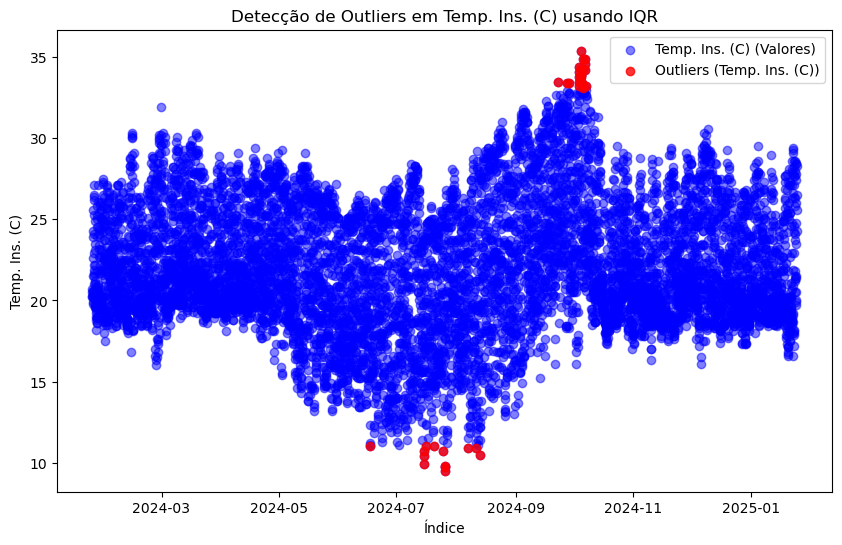


Coluna: Temp. Max. (C)
Total de outliers detectados: 20


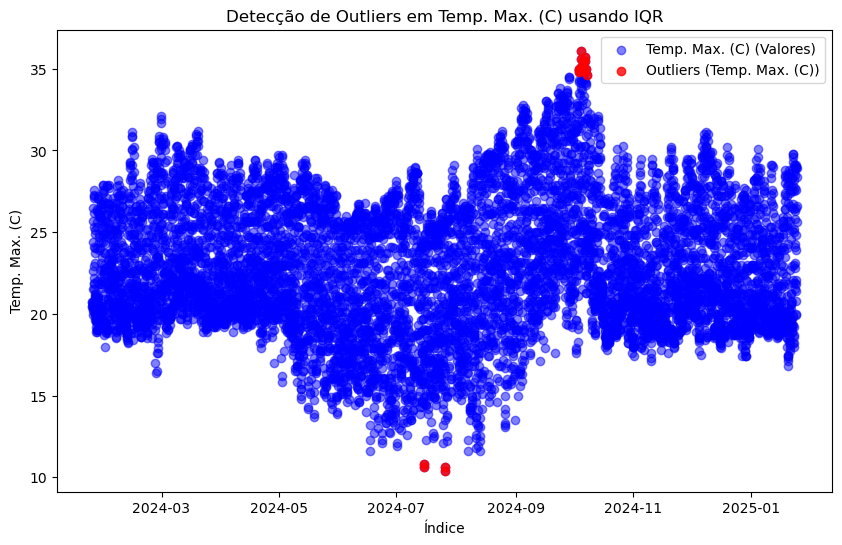


Coluna: Temp. Min. (C)
Total de outliers detectados: 86


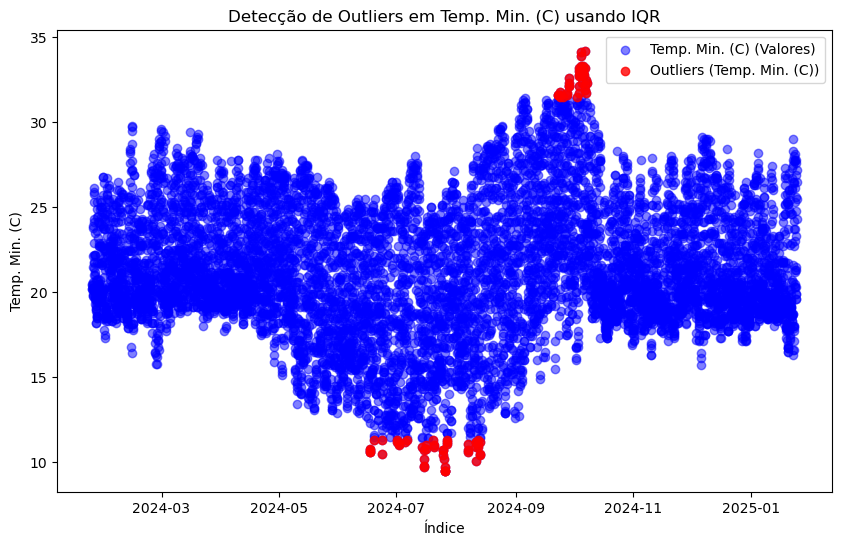

In [27]:
# Lista de colunas de temperatura no dataset
temp_cols = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']

# Verificar quais colunas de temperatura existem no DataFrame
temp_cols = [col for col in temp_cols if col in df.columns]

# Detectar outliers usando o método IQR para cada coluna de temperatura
for coluna in temp_cols:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = df[(df[coluna] < lower_bound) | (df[coluna] > upper_bound)]

    # Exibir a quantidade de outliers
    print(f"\nColuna: {coluna}")
    print(f"Total de outliers detectados: {len(outliers)}")

    # Criar gráfico de dispersão para visualizar os outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[coluna], label=f'{coluna} (Valores)', color='blue', alpha=0.5)
    plt.scatter(outliers.index, outliers[coluna], label=f'Outliers ({coluna})', color='red', alpha=0.8)
    
    plt.title(f"Detecção de Outliers em {coluna} usando IQR")
    plt.xlabel("Índice")
    plt.ylabel(coluna)
    plt.legend()
    plt.show()


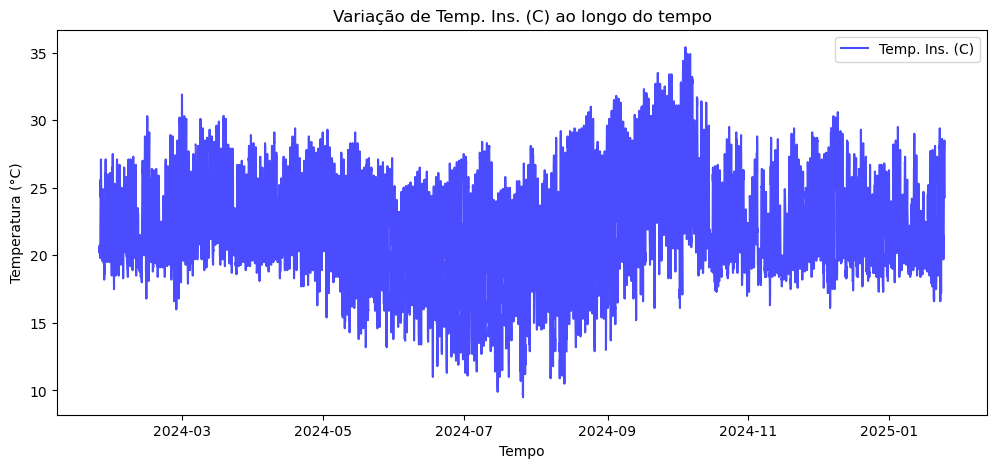

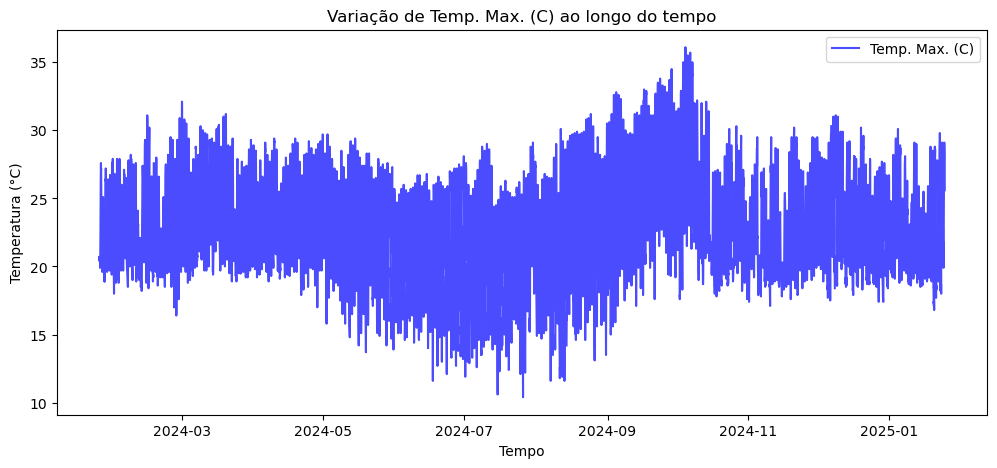

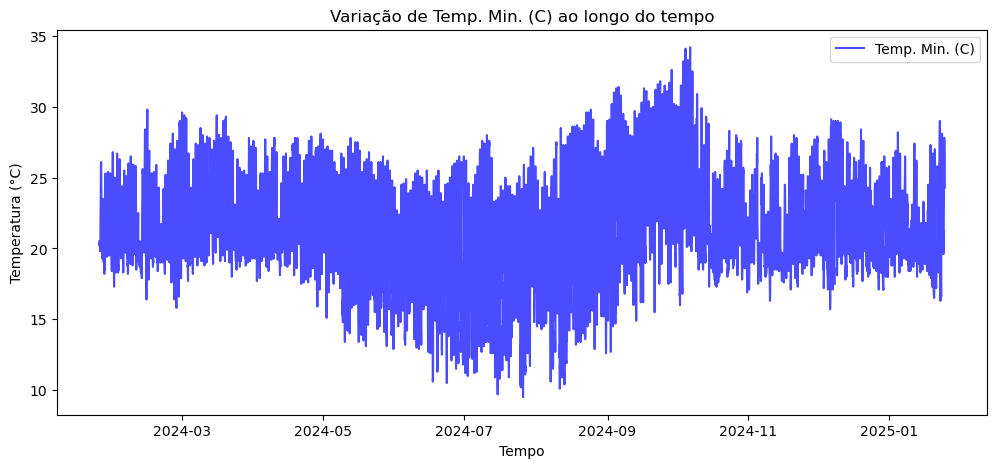

In [28]:
# Lista de colunas de temperatura no dataset
temp_cols = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']

# Verificar se as colunas de temperatura existem no DataFrame
temp_cols = [col for col in temp_cols if col in df.columns]

# Criar gráficos de temperatura ao longo do tempo
for col in temp_cols:
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df[col], label=col, color='b', alpha=0.7)
    plt.xlabel("Tempo")
    plt.ylabel("Temperatura (°C)")
    plt.title(f"Variação de {col} ao longo do tempo")
    plt.legend()
    plt.show()

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aplicar PCA para reduzir as variáveis de temperatura a um único componente principal
scaler = StandardScaler()
temp_data_scaled = scaler.fit_transform(df[temp_cols].dropna())
pca = PCA(n_components=1)  # Reduzindo para um único componente
df['Temperatura PCA'] = pca.fit_transform(temp_data_scaled)

# Exibir a variância explicada pelo primeiro componente
explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"\nO primeiro componente principal explica {explained_variance:.2f}% da variabilidade dos dados de temperatura.")

# Plotar a nova variável de temperatura ao longo do tempo
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Temperatura PCA'], label='Temperatura PCA', color='purple', alpha=0.7)
plt.xlabel("Tempo (Dia e Hora)")
plt.ylabel("Temperatura PCA (Unidade Normalizada)")
plt.title("Variação da Temperatura PCA ao longo do tempo")
plt.legend()
plt.show()

# Exibir os primeiros valores da nova variável criada pelo PCA
print("\nPrimeiros valores da Temperatura PCA:")
print(df[['Temperatura PCA']].head())

ValueError: Length of values (8757) does not match length of index (8784)

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Garantir que os valores de temperatura são numéricos e sem valores ausentes
for col in temp_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Remover linhas com valores nulos nas colunas de temperatura antes de aplicar PCA
df_pca = df[temp_cols].dropna().copy()

# Normalizar os dados de temperatura antes de aplicar PCA
scaler = StandardScaler()
temp_data_scaled = scaler.fit_transform(df_pca)

# Aplicar PCA para reduzir as variáveis de temperatura a um único componente principal
pca = PCA(n_components=1)
df_pca['Temperatura PCA'] = pca.fit_transform(temp_data_scaled)

# Restaurar o índice original ao DataFrame reduzido
df_pca = df_pca.merge(df[['data_hora']], left_index=True, right_index=True, how='left')

# Exibir a variância explicada pelo primeiro componente
explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"\nO primeiro componente principal explica {explained_variance:.2f}% da variabilidade dos dados de temperatura.")

# Plotar a nova variável de temperatura ao longo do tempo
plt.figure(figsize=(12, 5))
plt.plot(df_pca.index, df_pca['Temperatura PCA'], label='Temperatura PCA', color='purple', alpha=0.7)
plt.xlabel("Tempo (Dia e Hora)")
plt.ylabel("Temperatura PCA (Unidade Normalizada)")
plt.title("Variação da Temperatura PCA ao longo do tempo")
plt.legend()
plt.show()

# Exibir os primeiros valores da nova variável criada pelo PCA
print("\nPrimeiros valores da Temperatura PCA:")
print(df_pca[['Temperatura PCA']].head())


KeyError: "None of [Index(['data_hora'], dtype='object')] are in the [columns]"